In [2]:
# prompt: mount this https://github.com/TomerGrinberg1/Presidential-Debate-RAG too

!git clone https://github.com/TomerGrinberg1/Presidential-Debate-RAG.git

Cloning into 'Presidential-Debate-RAG'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 110 (delta 39), reused 52 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (110/110), 32.60 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openai==0.28.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.52.2
    Uninstalling openai-1.52.2:
      Successfully uninstalled openai-1.52.2


In [ ]:
import os
os.environ['OPENAI_API_KEY'] = ''

In [9]:
%env OPENAI_API_KEY= ''

env: OPENAI_API_KEY=''


In [ ]:
import openai
import json

# Initialize OpenAI API Key
openai.api_key = ''

def rephrase(answer_text, candidate_name):
    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": f"Rewrite the given passage for {candidate_name}, keeping the main ideas. in addition, rearrange the order in which things were said. it should not be incredibely easy to tell that its the generated text was based on the original, but if a reader were to know it was based off of the original passage, it would be easy to tell"},
            {"role": "user", "content": answer_text}
        ]
    )
    return response.choices[0].message['content']

# Load original JSON list
with open('/content/drive/MyDrive/RAG Debate Project Lab semester 8/debate transcription files/debate_final_json.json', 'r') as f:
    original_data = json.load(f)

# Process each dictionary
new_data = []
for entry in original_data:
    real_answer = entry.get("answer")
    candidate = entry.get("candidate")

    # Rephrase answer using GPT
    generated_response = rephrase(real_answer, candidate)

    # Append new structured data
    new_data.append({
        "generated_response": generated_response,
        "real_answer": real_answer,
        "candidate": candidate
    })

# Save the new JSON output
with open('/content/drive/MyDrive/RAG Debate Project Lab semester 8/debate transcription files/rephrased_debate2.json', 'w') as f:
    json.dump(new_data, f, indent=2)

print("New JSON created")


New JSON created


In [ ]:
!pip install --upgrade openai


In [ ]:
f"""
                You are a language model tasked with evaluating the likelihood that a generated response could have been said by U.S. presidential candidate {self.candidate_name}. Your goal is to assess how plausible it is that this generated response matches the style, content, and reasoning typical of {self.candidate_name}.

                Consider aspects such as the content, style, and reasoning used by the candidate. However, do not limit yourself to fixed criteria—each evaluation may emphasize different dimensions of similarity, depending on what stands out most in the given response.

                After your analysis, rate the similarity on a scale from 1 to 5:
                - 1: Very unlikely - The response has few or no characteristics that resemble the candidate's typical speech.
                - 2: Somewhat unlikely - There are minimal elements that resemble the candidate, but mostly divergent.
                - 3: Plausible - The response partially matches some elements of the candidate's usual rhetoric or reasoning.
                - 4: Likely - The response strongly resembles what the candidate could have said, with minor deviations.
                - 5: Very likely - The response is nearly indistinguishable from what the candidate would have said.

                Provide your evaluation in the form of a JSON object, ensuring that your explanation details the relevant aspects of similarity or divergence. Use chain-of-thought reasoning to arrive at your conclusions, detailing your reasoning step by step.
                Your response should be formatted as follows:
                {{
                    "Explanation": "string",
                    "Similarity": int [1-5]
                }}
            """

candidate likelihood

In [ ]:
%pip install langfuse openai --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.0/222.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: anyio
    Found existing installation: anyio 3.7.1
    Uninstalling anyio-3.7.1:
      Successfully uninstalled anyio-3.7.1
  Attempting uninstall: openai
    Found existing installation: openai 1.52.2
    Uninstalling openai-1.52.2:
      Successfully uninstalled openai-1.52.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires anyio<4,>=3.1.0, but you have anyio 4.6.2.post1 which is incompatible.


In [ ]:
import os

# get keys for your project from https://cloud.langfuse.com
os.environ["LANGFUSE_PUBLIC_KEY"] = ""
os.environ["LANGFUSE_SECRET_KEY"] = ""

# your openai key
os.environ["OPENAI_API_KEY"] = ''

In [ ]:
from langfuse.openai import openai
import json
import os
from pydantic import BaseModel, conint

class EvaluationResponse(BaseModel):
    Explanation: str
    Similarity: conint(ge=1, le=5)  # Limits Similarity to values between 1 and 5

schema = EvaluationResponse.schema()

# Initialize OpenAI API key
openai.api_key = os.getenv("OPENAI_API_KEY")

class Evaluator:
    def __init__(self, candidate_name):
        self.candidate_name = candidate_name

    def evaluate_candidate_likelihood(self, generated_response):
        system_prompt = f"""
        You are a language model tasked with evaluating the likelihood that a generated response could have been said by U.S. presidential candidate {self.candidate_name}. Your goal is to assess how plausible it is that this generated response matches the style, content, and reasoning typical of {self.candidate_name}.

        Consider aspects such as the content, style, and reasoning used by the candidate. However, do not limit yourself to fixed criteria—each evaluation may emphasize different dimensions of similarity, depending on what stands out most in the given response.

        After your analysis, rate the similarity on a scale from 1 to 5:
        - 1: Very unlikely - The response has few or no characteristics that resemble the candidate's typical speech.
        - 2: Somewhat unlikely - There are minimal elements that resemble the candidate, but mostly divergent.
        - 3: Plausible - The response partially matches some elements of the candidate's usual rhetoric or reasoning.
        - 4: Likely - The response strongly resembles what the candidate could have said, with minor deviations.
        - 5: Very likely - The response is nearly indistinguishable from what the candidate would have said.
        """

        # Use the schema in function call to enforce the structured output
        response = openai.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": generated_response}
            ],
            functions=[
                {
                    "name": "evaluate_candidate_likelihood",
                    "description": "Evaluates the response and returns an explanation and similarity rating",
                    "parameters": schema
                }
            ],
            function_call={"name": "evaluate_candidate_likelihood"}
        )

        # Return the structured evaluation response directly
        return json.loads(response.choices[0].message.function_call.arguments)

# Define input and output folders
input_folder = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/simulations"
output_folder = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations"
os.makedirs(output_folder, exist_ok=True)

# Process each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".json") and filename in ["generated_debate_with_RAG_dense_using_Llama-3.2-90B-Vision-Instruct_evaluator.json"]:
        input_filepath = os.path.join(input_folder, filename)

        # Load JSON data for each file
        with open(input_filepath, 'r') as f:
            original_data = json.load(f)

        # Process and add evaluations
        for entry in original_data:
            question = entry["question"]
            generated_response = entry["generated_response"].get("Meta-Llama-3.1-8B-Instruct")
            candidate_name = entry["candidate"]

            # Initialize Evaluator with candidate name
            evaluator = Evaluator(candidate_name)

            # Evaluate the likelihood
            evaluation = evaluator.evaluate_candidate_likelihood(generated_response)

            # Add the evaluation result to the original entry
            entry["evaluation"] = evaluation

        # Save the modified JSON with evaluations added to the output folder
        output_filename = f"{os.path.splitext(filename)[0]}_evaluated.json"
        output_filepath = os.path.join(output_folder, output_filename)

        with open(output_filepath, 'w') as f:
            json.dump(original_data, f, indent=2)

        print(f"Evaluated JSON created: {output_filepath}")


Evaluated JSON created: /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/generated_debate_with_RAG_dense_using_Llama-3.2-90B-Vision-Instruct_evaluator_evaluated.json


In [ ]:
# Define dimensional prompts
dimensional_prompts = {
    "content": """
        You are tasked with evaluating the similarity of content between a real response given by a U.S. presidential candidate and a generated response. Your goal is to determine to what extent the generated response covers the same key points, uses similar examples or references, and avoids introducing new information.

        Rate the content similarity on a scale from 1 to 5:
        - 1: Very dissimilar - Covers very few key points; significant differences.
        - 2: Somewhat dissimilar - Some key points are present but missing many details.
        - 3: Moderately similar - Partial overlap in key points with some divergence.
        - 4: Very similar - Most key points are covered with minor differences.
        - 5: Extremely similar - Almost identical coverage of key points.

        Provide your evaluation as a JSON object with an explanation and similarity score, using thorough chain-of-thought reasoning to reach your conclusion.
        {
            "Explanation": "string",
            "Similarity": int [1-5]
        }
    """,
    "style": """
        You are tasked with evaluating the similarity of style between a real response given by a U.S. presidential candidate and a generated response. Consider aspects such as tone (formal, casual, assertive), rhetorical devices, language choices, and sentence structure. Evaluate how well these stylistic aspects align.

        Rate the style similarity on a scale from 1 to 5:
        - 1: Very dissimilar - Completely different tone, vocabulary, and structure.
        - 2: Somewhat dissimilar - Only a few similar stylistic elements.
        - 3: Moderately similar - Shares some stylistic aspects but with clear differences.
        - 4: Very similar - Strong similarity in tone, vocabulary, and sentence structure.
        - 5: Extremely similar - Nearly indistinguishable stylistic match.

        Provide your evaluation as a JSON object with an explanation and similarity score, using thorough chain-of-thought reasoning to reach your conclusion.
        {
            "Explanation": "string",
            "Similarity": int [1-5]
        }
    """,
    "reasoning": """
        You are tasked with evaluating the similarity in reasoning between a real response given by a U.S. presidential candidate and a generated response. Consider the logical flow, argument structure, and how well the reasoning aligns with the typical patterns of the candidate. Your evaluation should focus on consistency in argumentation and logical development.

        Rate the reasoning similarity on a scale from 1 to 5:
        - 1: Very dissimilar - Almost no logical alignment or flow.
        - 2: Somewhat dissimilar - Some similar arguments but largely divergent.
        - 3: Moderately similar - Partial similarity in argumentation but some gaps.
        - 4: Very similar - Strong logical consistency with minor variations.
        - 5: Extremely similar - Nearly identical reasoning and logical structure.

        Provide your evaluation as a JSON object with an explanation and similarity score, using thorough chain-of-thought reasoning to reach your conclusion.
        {
            "Explanation": "string",
            "Similarity": int [1-5]
        }
    """,
    "emotion": """
        You are tasked with evaluating the emotional similarity between a real response given by a U.S. presidential candidate and a generated response. Consider the emotional tone (e.g., passion, empathy, anger) and the intent (e.g., to persuade, to criticize). Evaluate whether the generated response conveys similar emotions and intentions as the real one.

        Rate the emotional similarity on a scale from 1 to 5:
        - 1: Very dissimilar - Conveys completely different emotions and intent.
        - 2: Somewhat dissimilar - Some overlapping emotions but largely divergent.
        - 3: Moderately similar - Partial emotional overlap but with noticeable differences.
        - 4: Very similar - Strong similarity in emotional tone and intent.
        - 5: Extremely similar - Nearly identical in emotional resonance and intent.

        Provide your evaluation as a JSON object with an explanation and similarity score, using thorough chain-of-thought reasoning to reach your conclusion.
        {
            "Explanation": "string",
            "Similarity": int [1-5]
        }
    """,
    "context": """
        You are tasked with evaluating the similarity in context consistency between a real response given by a U.S. presidential candidate and a generated response. Consider whether the generated response effectively accounts for the given context, refers to the same events or situations, and maintains coherence in a similar way to the real response.

        Rate the context consistency on a scale from 1 to 5:
        - 1: Very dissimilar - Contextual references are almost completely unrelated.
        - 2: Somewhat dissimilar - Some context is shared, but there are major inconsistencies.
        - 3: Moderately similar - Partial coherence with notable deviations.
        - 4: Very similar - Strong contextual consistency with minor differences.
        - 5: Extremely similar - Nearly indistinguishable context references and coherence.

        Provide your evaluation as a JSON object with an explanation and similarity score, using thorough chain-of-thought reasoning to reach your conclusion.
        {
            "Explanation": "string",
            "Similarity": int [1-5]
        }
    """
}


In [ ]:
pip install demjson3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75281 sha256=44ebc3cf29b0a32ab40cc9c3167248601635dd8965729d720a5c1d6db1c4b2e7
  Stored in directory: /root/.cache/pip/wheels/2d/32/af/75c810e14c7ca0df40c20c662fcc7f33d1e055937b4e452cc1
Successfully built demjson3


In [ ]:
# prompt: check if filename not in /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions folder

dimensions_folder = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions"
os.makedirs(dimensions_folder, exist_ok=True)

for filename in os.listdir(output_folder):
    if filename.endswith("_evaluated.json"):
        input_filepath = os.path.join(output_folder, filename)

        with open(input_filepath, 'r') as f:
            data = json.load(f)

        for entry in data:
            real_answer = entry["real_answer"]
            generated_response = entry["generated_response"]
            candidate_name = entry["candidate"]

            for dimension, prompt in dimensional_prompts.items():
                response = openai.chat.completions.create(
                    model="gpt-4o",
                    messages=[
                        {"role": "system", "content": prompt},
                        {"role": "user", "content": f"Real Response: {real_answer}\nGenerated Response: {generated_response}"}
                    ],
                    functions=[
                        {
                            "name": "evaluate_dimension",
                            "description": "Evaluates a specific dimension and returns an explanation and similarity rating",
                            "parameters": schema
                        }
                    ],
                    function_call={"name": "evaluate_dimension"}
                )

                evaluation_result = json.loads(response.choices[0].message.function_call.arguments)
                entry[f"{dimension}_evaluation"] = evaluation_result

        output_filename = f"{os.path.splitext(filename)[0]}_dimensioned.json"
        output_filepath = os.path.join(dimensions_folder, output_filename)

        with open(output_filepath, 'w') as f:
            json.dump(data, f, indent=2)

        print(f"Dimensioned JSON created: {output_filepath}")

In [ ]:
from langfuse.openai import openai
import json
import os
from pydantic import BaseModel, conint
from typing import Dict
import demjson3

# Define the structured response format with Pydantic
class EvaluationResponse(BaseModel):
    Explanation: str
    Similarity: conint(ge=1, le=5)  # Limit to values between 1 and 5

schema = EvaluationResponse.schema()

# Initialize OpenAI API key
openai.api_key = os.getenv("OPENAI_API_KEY")


class Evaluator:
    def __init__(self, real_response, generated_response):
        self.real_response = real_response
        self.generated_response = generated_response

    def evaluate_dimension(self, dimension, prompt):
        system_prompt = prompt

        # Use schema to enforce structured output in OpenAI API
        response = openai.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content":  f'\nReal response: "{self.real_response}"\nGenerated response: "{self.generated_response}"'}
            ],
            functions=[
                {
                    "name": "evaluate_dimension",
                    "description": f"Evaluates {dimension} similarity and returns explanation and similarity score",
                    "parameters": schema
                }
            ],
            function_call={"name": "evaluate_dimension"}
        )

        # Directly use structured evaluation response
        # Try to parse the JSON response
        try:
            # Directly use structured evaluation response
            return json.loads(response.choices[0].message.function_call.arguments)

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            malformed_json = response.choices[0].message.function_call.arguments

            # Attempt to parse "almost JSON" using demjson3
            try:
                print("Attempting to parse with demjson3 for lenient parsing.")
                return demjson3.decode(malformed_json)

            except demjson3.JSONDecodeError as e_demjson:
                print(f"demjson3 also failed to decode: {e_demjson}")

                # If all else fails, return an error message in a structured JSON format
                return {
                    "Explanation": "Error in parsing response",
                    "Similarity": -1,  # Use -1 or another indicator for error
                    "Error": str(e)
                }

# Define input and output folders
input_folder = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/simulations"
output_folder = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions"
os.makedirs(output_folder, exist_ok=True)

# Process each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".json") and filename not in ['generated_debate_with_RAG_hybrid_using_Llama-3.2-90B-Vision-Instruct_evaluator.json', 'adjusted_generated_debate_without_RAG.json', 'generated_debate_with_RAG_dense_using_gpt4o_evaluator.json'] :
        input_filepath = os.path.join(input_folder, filename)

        # Load JSON data for each file
        with open(input_filepath, 'r') as f:
            original_data = json.load(f)

        # Process each entry and add evaluations across dimensions
        for entry in original_data:
            real_response = entry["real_answer"]
            generated_response = entry["generated_response"].get("Meta-Llama-3.1-8B-Instruct")

            evaluator = Evaluator(real_response, generated_response)
            entry["evaluations"] = {}

            # Evaluate each dimension and add results
            for dimension, prompt in dimensional_prompts.items():
                evaluation = evaluator.evaluate_dimension(dimension, prompt)
                entry["evaluations"][f"{dimension}_similarity"] = evaluation

        # Save the modified JSON with evaluations added to the output folder
        output_filename = f"{os.path.splitext(filename)[0]}_dimensions_evaluated.json"
        output_filepath = os.path.join(output_folder, output_filename)

        with open(output_filepath, 'w') as f:
            json.dump(original_data, f, indent=2)

        print(f"Evaluated JSON created: {output_filepath}")


Evaluated JSON created: /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/generated_debate_with_RAG_dense_using_Llama-3.2-90B-Vision-Instruct_evaluator_dimensions_evaluated.json
Evaluated JSON created: /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/generated_debate_with_RAG_hybrid_using_gpt4o_evaluator_dimensions_evaluated.json
Evaluated JSON created: /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/generated_debate_with_RAG_sparse_using_Llama-3.2-90B-Vision-Instruct_evaluator_dimensions_evaluated.json
Evaluated JSON created: /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/generated_debate_with_RAG_sparse_using_gpt4o_evaluator_dimensions_evaluated.json
Evaluated JSON created: /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/generated_debate_without_RAG_using_gpt4o_evaluator_dimensions_evaluated.json


In [3]:
# prompt: print the schema of this /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/adjusted_generated_debate_without_RAG_evaluated.json

import json
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/adjusted_generated_debate_without_RAG_evaluated.json', 'r') as f:
  data = json.load(f)

# Print the schema of the first element (assuming it's representative)
if data:
  print(json.dumps(data[0], indent=2))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{
  "question": "And please welcome the 45th president of the United States, Donald Trump. Gentlemen, thanks so much for being here. Let's begin the debate. And let's start with the issue that voters consistently say is their top concern, the economy. President Biden, inflation has slowed, but prices remain high. Since you took office, the price of essentials has increased. For example, a basket of groceries that cost $100, then, now costs more than $120. And typical home prices have jumped more than 30 percent. What do you say to voters who feel they are worse off under your presidency than they were under President Trump?",
  "real_answer": "We've got to take a look at what I was left when I became president, what Mr. Trump left me. We had an economy that was in freefall. The pandemic was so badly handled. Many people were dying. All he said was it's not th

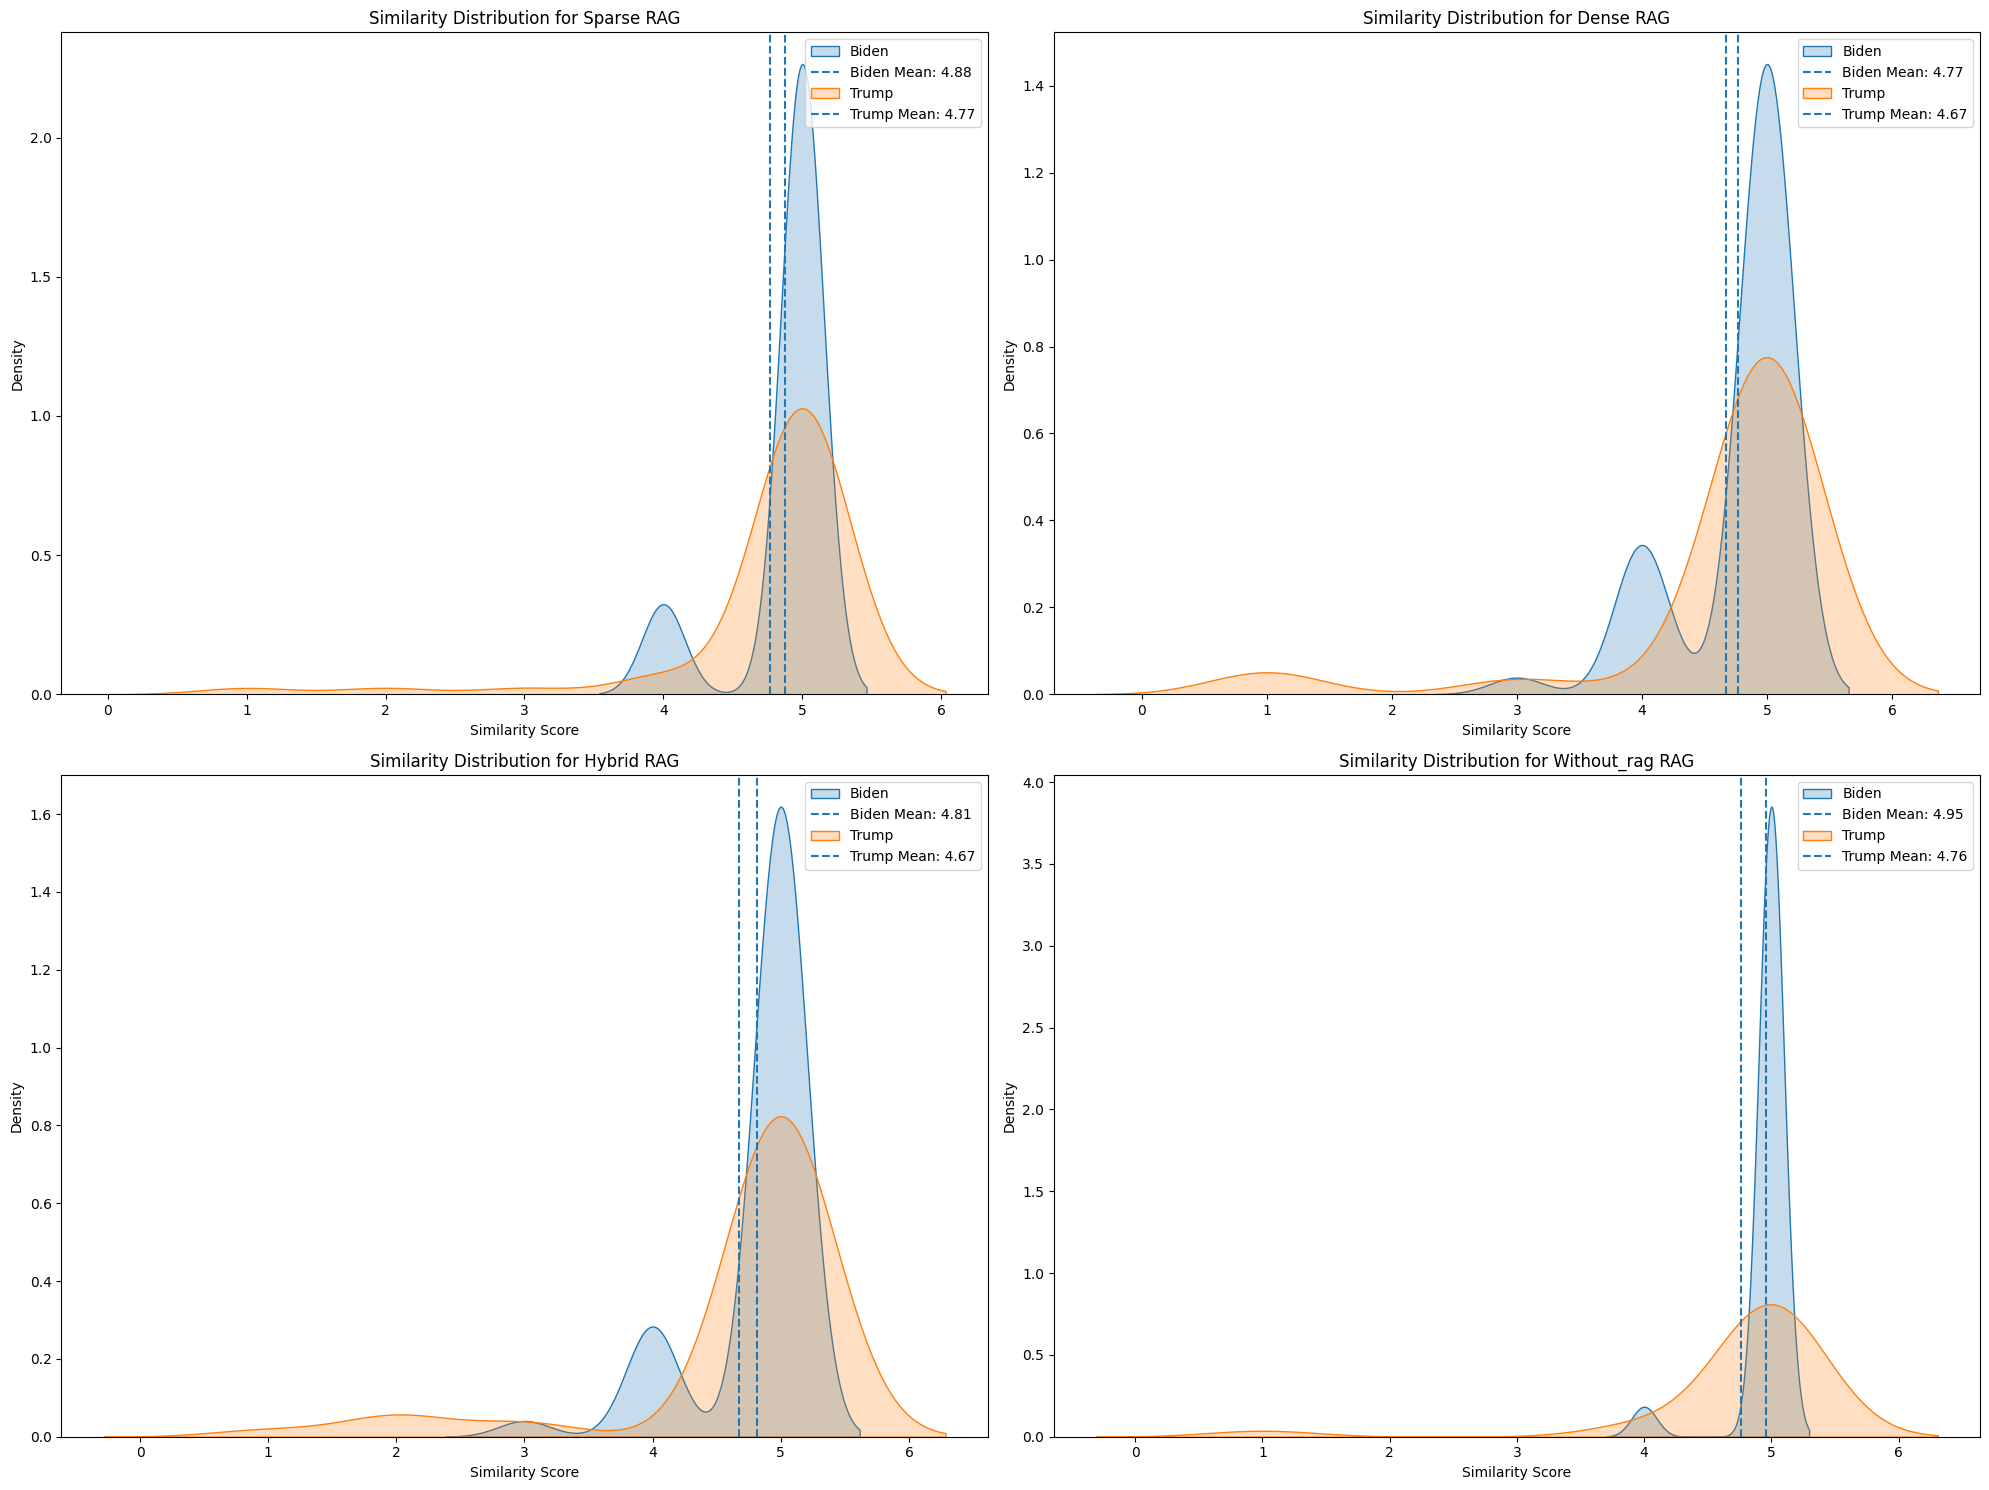


P-Values for RAG vs. Non-RAG Comparison:
Biden - Sparse vs. Without RAG: p-value = 0.180
Trump - Sparse vs. Without RAG: p-value = 0.961
Biden - Dense vs. Without RAG: p-value = 0.020
Trump - Dense vs. Without RAG: p-value = 0.709
Biden - Hybrid vs. Without RAG: p-value = 0.057
Trump - Hybrid vs. Without RAG: p-value = 0.696


In [10]:
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define the directory containing the JSON files
directory = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations"

# Initialize lists to store the extracted data
data = []

# Regex patterns for filtering responses
exclude_start = re.compile(r"^I cannot provide a response")
exclude_end_1 = re.compile(r"Is there something else I can help you with\?$")
exclude_end_2 = re.compile(r"Is there anything else I can help you with\?$")

# Load and filter data
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        # Handle different filename structures for RAG and non-RAG cases
        if "without_RAG" in filename:
            rag_type = "without_RAG"
        elif "sparse" in filename:
            rag_type = "sparse"
        elif "dense" in filename:
            rag_type = "dense"
        elif "hybrid" in filename:
            rag_type = "hybrid"
        else:
            continue  # Skip any files that don’t match expected RAG types

        file_path = os.path.join(directory, filename)

        # Load JSON file
        with open(file_path, 'r') as f:
            json_data = json.load(f)

            # Iterate through each item in the JSON file
            for item in json_data:
                candidate = item.get("candidate", "")
                evaluation = item.get("evaluation", {})
                generated_response = item.get("generated_response", {}).get("Meta-Llama-3.1-8B-Instruct", "")

                # Apply the filter criteria
                if (exclude_start.match(generated_response) or
                    exclude_end_1.search(generated_response) or
                    exclude_end_2.search(generated_response)):
                    continue

                similarity = evaluation.get("Similarity")

                # Only proceed if similarity score is present
                if similarity is not None:
                    # Convert similarity score of 6 to 5
                    if similarity == 6:
                        similarity = 5
                    data.append({
                        "candidate": candidate,
                        "rag_type": rag_type,
                        "similarity": similarity
                    })

# Convert data to a DataFrame for analysis
df = pd.DataFrame(data)

# Define candidates and RAG types
candidates = df["candidate"].unique()
rag_types = ["sparse", "dense", "hybrid", "without_RAG"]

# Set up separate subplots for each RAG method
plt.figure(figsize=(20, 15))

# Dictionary to store p-values for easier reading outside the plot
p_values = {}

for idx, rag_type in enumerate(rag_types, 1):
    plt.subplot(2, 2, idx)

    # Plot similarity distribution for each candidate within the current RAG type
    for candidate in candidates:
        subset = df[(df["candidate"] == candidate) & (df["rag_type"] == rag_type)]

        sns.kdeplot(subset["similarity"], label=f"{candidate.capitalize()}", fill=True)

        # Calculate mean only (median removed)
        mean_val = subset["similarity"].mean()

        # Plot mean as a vertical line
        if not pd.isna(mean_val):
            plt.axvline(mean_val, linestyle="--", label=f"{candidate.capitalize()} Mean: {mean_val:.2f}")

        # T-test p-value against non-RAG (only relevant for RAG types)
        if rag_type != "without_RAG":
            non_rag_subset = df[(df["candidate"] == candidate) & (df["rag_type"] == "without_RAG")]
            t_stat, p_val = ttest_ind(subset["similarity"].dropna(), non_rag_subset["similarity"].dropna())

            # Store p-value for output
            p_values[(candidate, rag_type)] = p_val

    # Plot settings
    plt.title(f"Similarity Distribution for {rag_type.capitalize()} RAG")
    plt.xlabel("Similarity Score")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

# Print p-values for each candidate and RAG method comparison to non-RAG
print("\nP-Values for RAG vs. Non-RAG Comparison:")
for (candidate, rag_type), p_val in p_values.items():
    print(f"{candidate.capitalize()} - {rag_type.capitalize()} vs. Without RAG: p-value = {p_val:.3f}")


In [12]:
# prompt: print the schema of this /content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/generated_debate_with_RAG_dense_using_gpt4o_evaluator_dimensions_evaluated.json but remove actual values so only keys and type appear

import json
from collections import defaultdict

def get_schema(data):
  schema = defaultdict(lambda: {'type': 'unknown'})
  if isinstance(data, dict):
    for key, value in data.items():
      schema[key] = {'type': type(value).__name__}
      schema[key].update(get_schema(value))
  elif isinstance(data, list):
    if data:
      schema['list_element'] = {'type': type(data[0]).__name__}
      schema['list_element'].update(get_schema(data[0]))
  return schema


with open('/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/generated_debate_with_RAG_dense_using_gpt4o_evaluator_dimensions_evaluated.json', 'r') as f:
  data = json.load(f)


if data:
  schema = get_schema(data[0])
  print(json.dumps(schema, indent=2))


{
  "question": {
    "type": "str"
  },
  "real_answer": {
    "type": "str"
  },
  "generated_response": {
    "type": "dict",
    "Meta-Llama-3.1-8B-Instruct": {
      "type": "str"
    }
  },
  "evaluation using gpt 4o": {
    "type": "dict",
    "Meta-Llama-3.1-8B-Instruct": {
      "type": "str"
    }
  },
  "candidate": {
    "type": "str"
  },
  "evaluations": {
    "type": "dict",
    "content_similarity": {
      "type": "dict",
      "Explanation": {
        "type": "str"
      },
      "Similarity": {
        "type": "int"
      }
    },
    "style_similarity": {
      "type": "dict",
      "Explanation": {
        "type": "str"
      },
      "Similarity": {
        "type": "int"
      }
    },
    "reasoning_similarity": {
      "type": "dict",
      "Explanation": {
        "type": "str"
      },
      "Similarity": {
        "type": "int"
      }
    },
    "emotion_similarity": {
      "type": "dict",
      "Explanation": {
        "type": "str"
      },
      "Similar

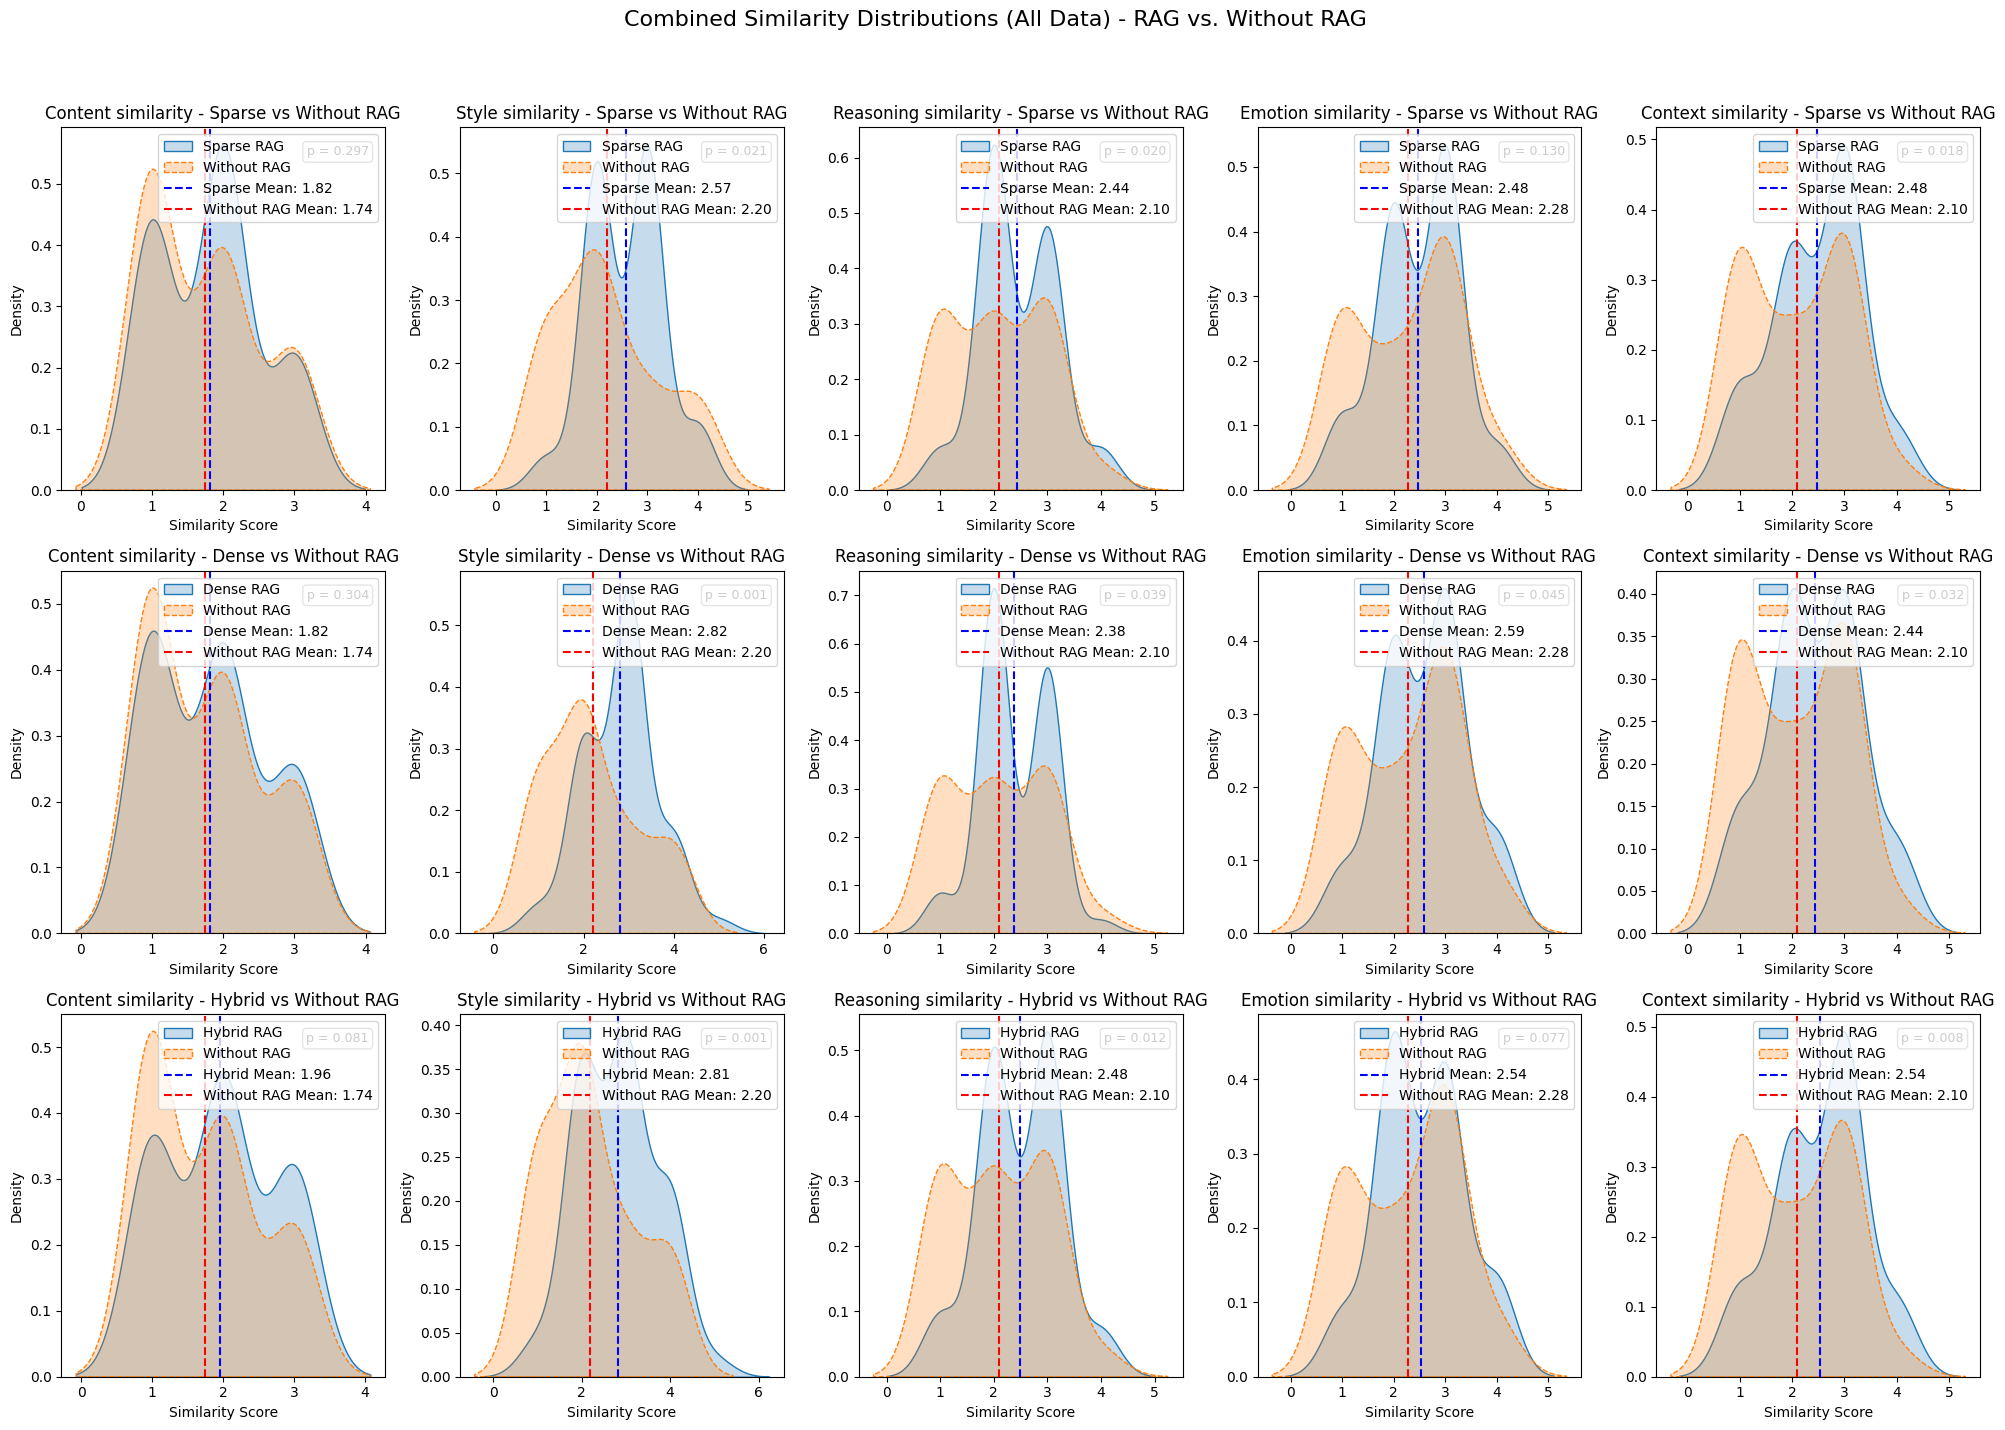


Combined P-Values for RAG vs. Non-RAG (All Data Across Candidates):
Content similarity - Sparse vs. Without RAG: p-value = 0.297
Style similarity - Sparse vs. Without RAG: p-value = 0.021
Reasoning similarity - Sparse vs. Without RAG: p-value = 0.020
Emotion similarity - Sparse vs. Without RAG: p-value = 0.130
Context similarity - Sparse vs. Without RAG: p-value = 0.018
Content similarity - Dense vs. Without RAG: p-value = 0.304
Style similarity - Dense vs. Without RAG: p-value = 0.001
Reasoning similarity - Dense vs. Without RAG: p-value = 0.039
Emotion similarity - Dense vs. Without RAG: p-value = 0.045
Context similarity - Dense vs. Without RAG: p-value = 0.032
Content similarity - Hybrid vs. Without RAG: p-value = 0.081
Style similarity - Hybrid vs. Without RAG: p-value = 0.001
Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.012
Emotion similarity - Hybrid vs. Without RAG: p-value = 0.077
Context similarity - Hybrid vs. Without RAG: p-value = 0.008


In [17]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define the directory containing the JSON files
directory = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/gpt4o"

# Initialize lists to store the extracted data
data = []

# Load data based on the new schema without exclusions
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        # Determine RAG type from filename
        if "without_RAG" in filename:
            rag_type = "without_RAG"
        elif "sparse" in filename:
            rag_type = "sparse"
        elif "dense" in filename:
            rag_type = "dense"
        elif "hybrid" in filename:
            rag_type = "hybrid"
        else:
            continue  # Skip any files that don’t match expected RAG types

        file_path = os.path.join(directory, filename)

        # Load JSON file
        with open(file_path, 'r') as f:
            json_data = json.load(f)

            # Process each item in the JSON file
            for item in json_data:
                candidate = item.get("candidate", "")

                # Extract similarity scores from each dimension in evaluations
                for dimension in ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]:
                    similarity = item.get("evaluations", {}).get(dimension, {}).get("Similarity")

                    # Only proceed if similarity score is present
                    if similarity is not None:
                        # Convert similarity score of 6 to 5
                        if similarity == 6:
                            similarity = 5
                        data.append({
                            "candidate": candidate,
                            "rag_type": rag_type,
                            "dimension": dimension,
                            "similarity": similarity
                        })

# Convert data to a DataFrame for analysis
df = pd.DataFrame(data)

# Define RAG types and dimensions (excluding candidates for combined analysis)
rag_types = ["sparse", "dense", "hybrid"]
dimensions = ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]

# Dictionary to store p-values for easier reading outside the plot
p_values = {}

# Set up combined analysis (all data without candidate split)
fig_combined, axes_combined = plt.subplots(len(rag_types), len(dimensions), figsize=(20, 15))
fig_combined.suptitle("Combined Similarity Distributions (All Data) - RAG vs. Without RAG", fontsize=16)

for i, rag_type in enumerate(rag_types):
    for j, dimension in enumerate(dimensions):
        ax = axes_combined[i, j]

        # Filter data for this RAG method and dimension across all candidates
        rag_subset = df[(df["rag_type"] == rag_type) & (df["dimension"] == dimension)]
        non_rag_subset = df[(df["rag_type"] == "without_RAG") & (df["dimension"] == dimension)]

        # Plot distributions
        sns.kdeplot(rag_subset["similarity"], label=f"{rag_type.capitalize()} RAG", fill=True, ax=ax)
        sns.kdeplot(non_rag_subset["similarity"], label="Without RAG", fill=True, linestyle="--", ax=ax)

        # Calculate and plot means
        rag_mean = rag_subset["similarity"].mean()
        non_rag_mean = non_rag_subset["similarity"].mean()

        if not pd.isna(rag_mean):
            ax.axvline(rag_mean, linestyle="--", color="blue", label=f"{rag_type.capitalize()} Mean: {rag_mean:.2f}")
        if not pd.isna(non_rag_mean):
            ax.axvline(non_rag_mean, linestyle="--", color="red", label=f"Without RAG Mean: {non_rag_mean:.2f}")

        # One-sided t-test p-value (alternative='greater' for one-sided test)
        t_stat, p_val = ttest_ind(
            rag_subset["similarity"].dropna(),
            non_rag_subset["similarity"].dropna(),
            alternative='greater'
        )
        p_values[(dimension, rag_type)] = p_val  # Store p-value for combined analysis

        # Plot settings
        ax.set_title(f"{dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs Without RAG")
        ax.set_xlabel("Similarity Score")
        ax.set_ylabel("Density")
        ax.legend()

        # Optionally, display p-value on the plot
        ax.text(0.95, 0.95, f"p = {p_val:.3f}", transform=ax.transAxes, horizontalalignment='right', verticalalignment='top', fontsize=9, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print p-values for combined analysis
print("\nCombined P-Values for RAG vs. Non-RAG (All Data Across Candidates):")
for (dimension, rag_type), p_val in p_values.items():
    print(f"{dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs. Without RAG: p-value = {p_val:.3f}")


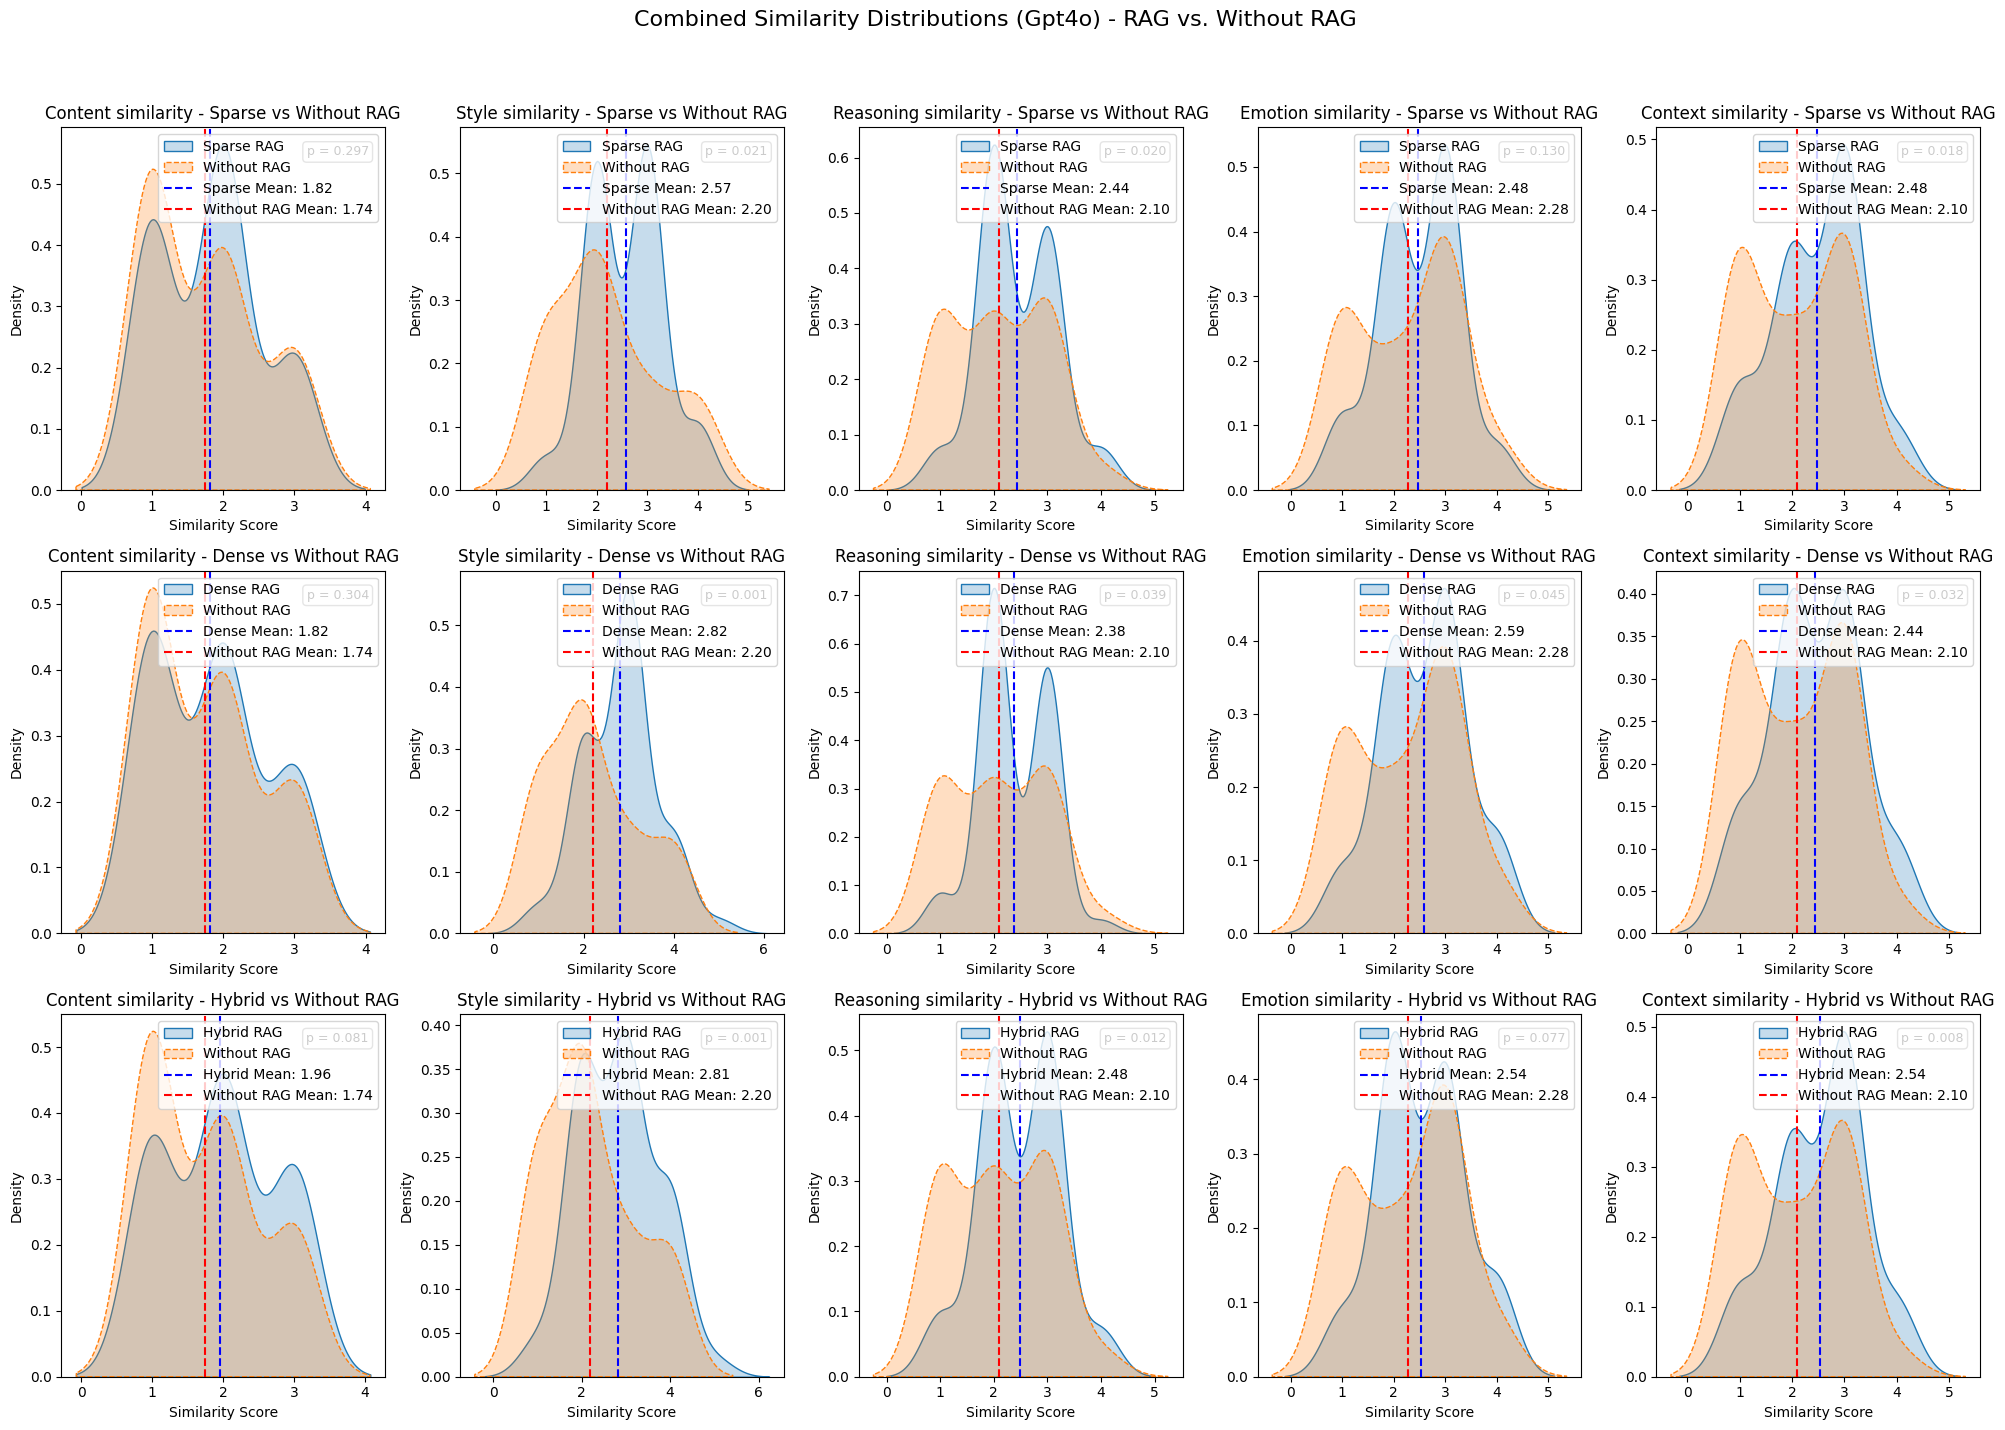


Combined P-Values for RAG vs. Non-RAG (Gpt4o - All Data Across Candidates):
Content similarity - Sparse vs. Without RAG: p-value = 0.297
Style similarity - Sparse vs. Without RAG: p-value = 0.021
Reasoning similarity - Sparse vs. Without RAG: p-value = 0.020
Emotion similarity - Sparse vs. Without RAG: p-value = 0.130
Context similarity - Sparse vs. Without RAG: p-value = 0.018
Content similarity - Dense vs. Without RAG: p-value = 0.304
Style similarity - Dense vs. Without RAG: p-value = 0.001
Reasoning similarity - Dense vs. Without RAG: p-value = 0.039
Emotion similarity - Dense vs. Without RAG: p-value = 0.045
Context similarity - Dense vs. Without RAG: p-value = 0.032
Content similarity - Hybrid vs. Without RAG: p-value = 0.081
Style similarity - Hybrid vs. Without RAG: p-value = 0.001
Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.012
Emotion similarity - Hybrid vs. Without RAG: p-value = 0.077
Context similarity - Hybrid vs. Without RAG: p-value = 0.008


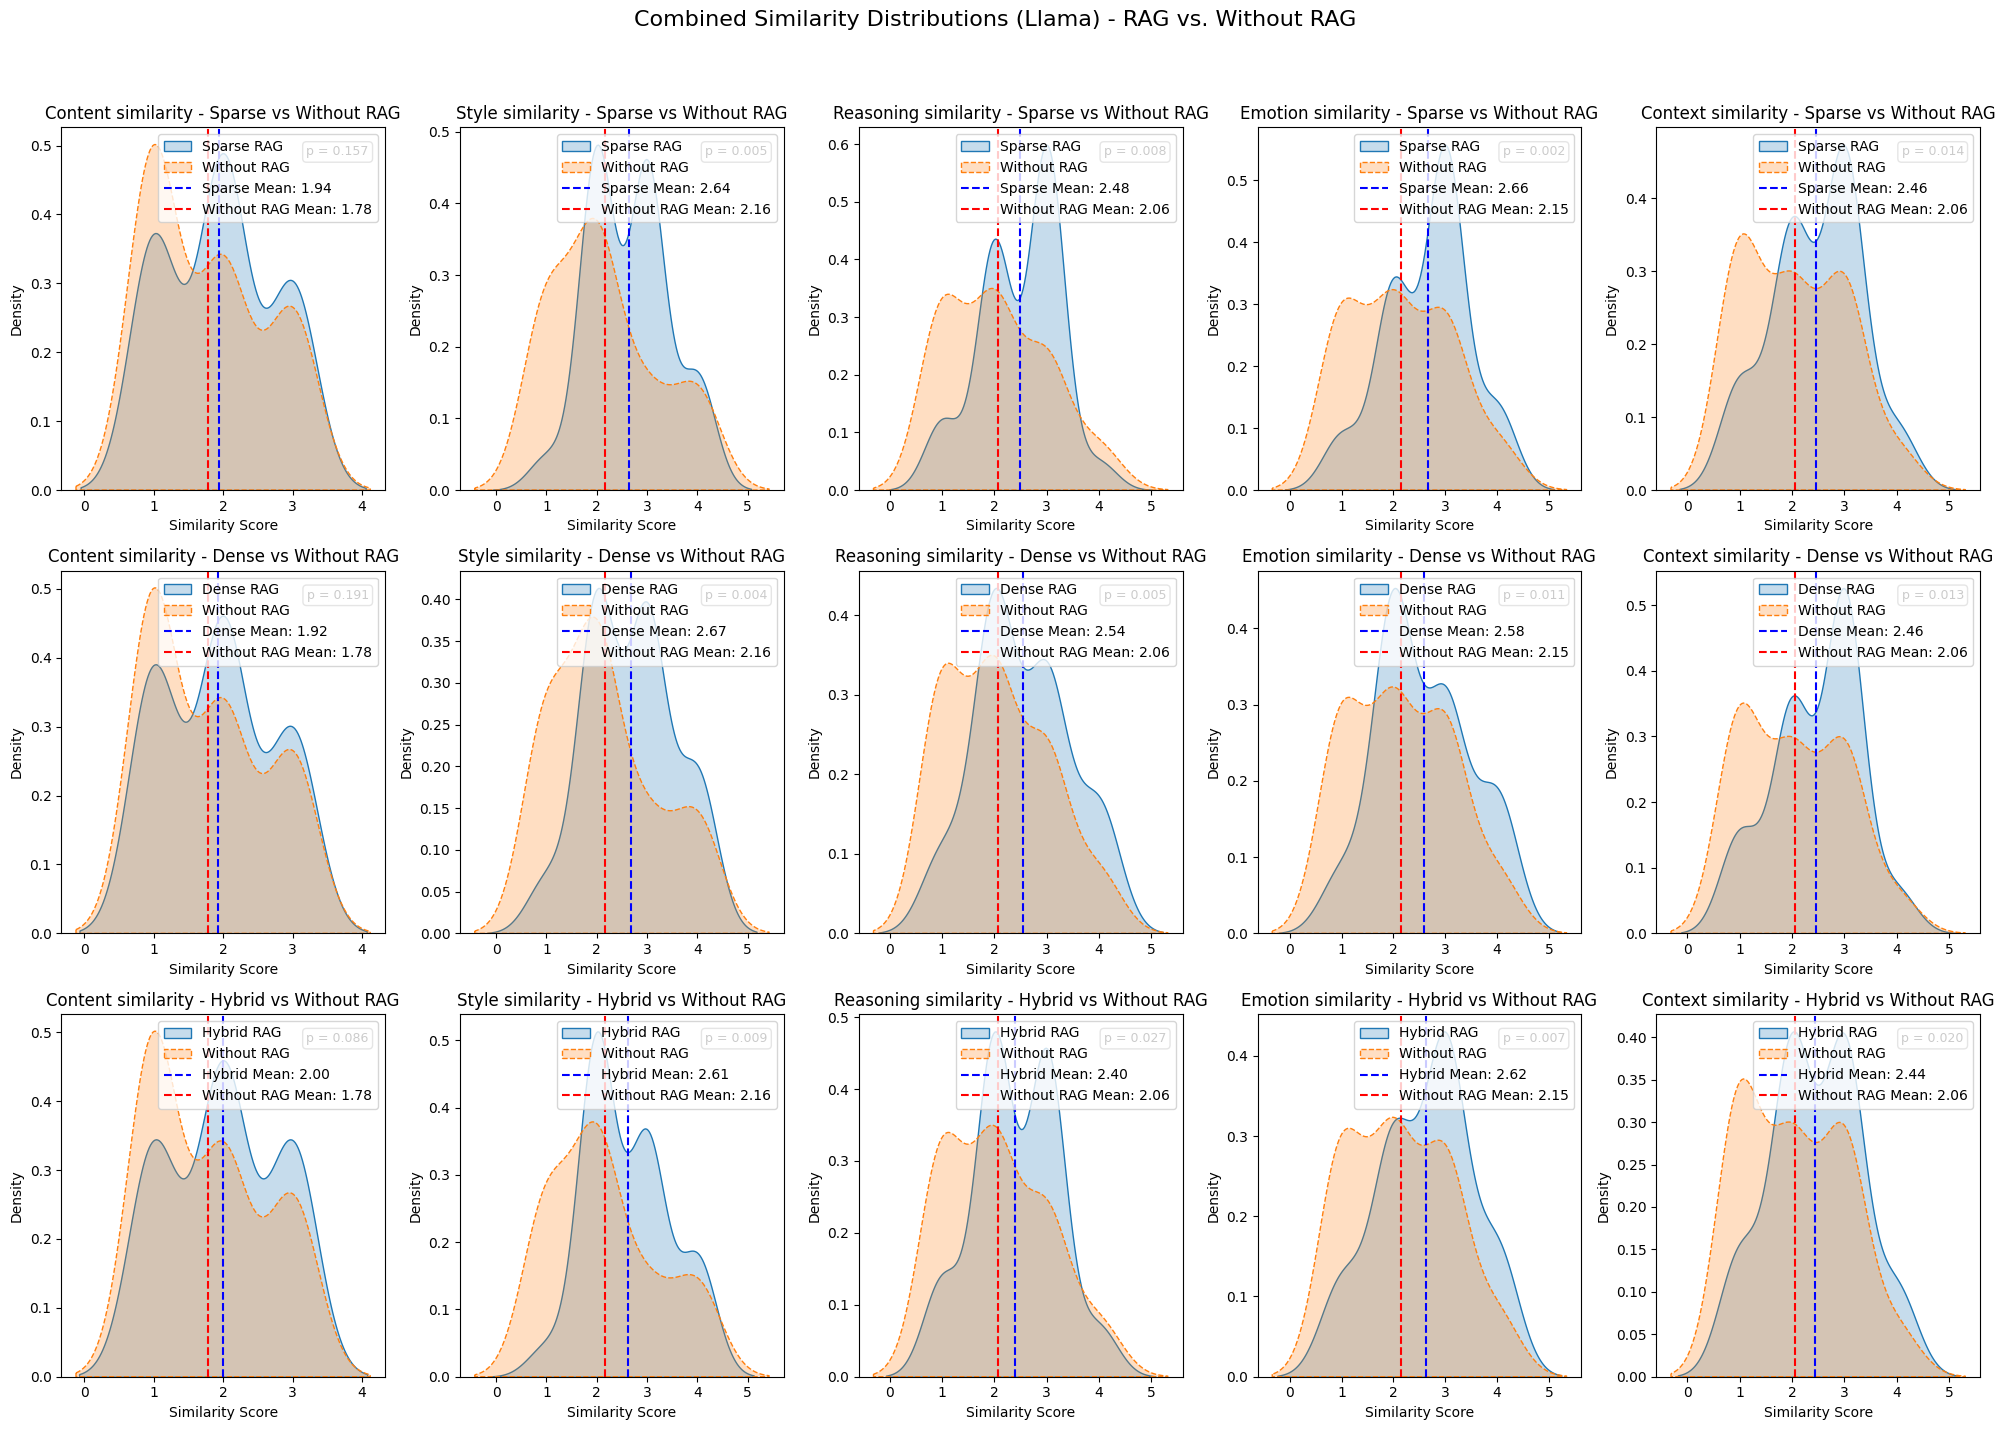


Combined P-Values for RAG vs. Non-RAG (Llama - All Data Across Candidates):
Content similarity - Sparse vs. Without RAG: p-value = 0.157
Style similarity - Sparse vs. Without RAG: p-value = 0.005
Reasoning similarity - Sparse vs. Without RAG: p-value = 0.008
Emotion similarity - Sparse vs. Without RAG: p-value = 0.002
Context similarity - Sparse vs. Without RAG: p-value = 0.014
Content similarity - Dense vs. Without RAG: p-value = 0.191
Style similarity - Dense vs. Without RAG: p-value = 0.004
Reasoning similarity - Dense vs. Without RAG: p-value = 0.005
Emotion similarity - Dense vs. Without RAG: p-value = 0.011
Context similarity - Dense vs. Without RAG: p-value = 0.013
Content similarity - Hybrid vs. Without RAG: p-value = 0.086
Style similarity - Hybrid vs. Without RAG: p-value = 0.009
Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.027
Emotion similarity - Hybrid vs. Without RAG: p-value = 0.007
Context similarity - Hybrid vs. Without RAG: p-value = 0.020


In [18]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define the directories for GPT-4o and Llama
directories = {
    "gpt4o": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/gpt4o",
    "llama": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/llama"
}

# Loop through each directory
for model_name, directory in directories.items():
    # Initialize lists to store the extracted data
    data = []

    # Load data based on the new schema without exclusions
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            # Determine RAG type from filename
            if "without_RAG" in filename:
                rag_type = "without_RAG"
            elif "sparse" in filename:
                rag_type = "sparse"
            elif "dense" in filename:
                rag_type = "dense"
            elif "hybrid" in filename:
                rag_type = "hybrid"
            else:
                continue  # Skip any files that don’t match expected RAG types

            file_path = os.path.join(directory, filename)

            # Load JSON file
            with open(file_path, 'r') as f:
                json_data = json.load(f)

                # Process each item in the JSON file
                for item in json_data:
                    candidate = item.get("candidate", "")

                    # Extract similarity scores from each dimension in evaluations
                    for dimension in ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]:
                        similarity = item.get("evaluations", {}).get(dimension, {}).get("Similarity")

                        # Only proceed if similarity score is present
                        if similarity is not None:
                            # Convert similarity score of 6 to 5
                            if similarity == 6:
                                similarity = 5
                            data.append({
                                "candidate": candidate,
                                "rag_type": rag_type,
                                "dimension": dimension,
                                "similarity": similarity
                            })

    # Convert data to a DataFrame for analysis
    df = pd.DataFrame(data)

    # Define RAG types and dimensions (excluding candidates for combined analysis)
    rag_types = ["sparse", "dense", "hybrid"]
    dimensions = ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]

    # Dictionary to store p-values for easier reading outside the plot
    p_values = {}

    # Set up combined analysis (all data without candidate split)
    fig_combined, axes_combined = plt.subplots(len(rag_types), len(dimensions), figsize=(20, 15))
    fig_combined.suptitle(f"Combined Similarity Distributions ({model_name.capitalize()}) - RAG vs. Without RAG", fontsize=16)

    for i, rag_type in enumerate(rag_types):
        for j, dimension in enumerate(dimensions):
            ax = axes_combined[i, j]

            # Filter data for this RAG method and dimension across all candidates
            rag_subset = df[(df["rag_type"] == rag_type) & (df["dimension"] == dimension)]
            non_rag_subset = df[(df["rag_type"] == "without_RAG") & (df["dimension"] == dimension)]

            # Plot distributions
            sns.kdeplot(rag_subset["similarity"], label=f"{rag_type.capitalize()} RAG", fill=True, ax=ax)
            sns.kdeplot(non_rag_subset["similarity"], label="Without RAG", fill=True, linestyle="--", ax=ax)

            # Calculate and plot means
            rag_mean = rag_subset["similarity"].mean()
            non_rag_mean = non_rag_subset["similarity"].mean()

            if not pd.isna(rag_mean):
                ax.axvline(rag_mean, linestyle="--", color="blue", label=f"{rag_type.capitalize()} Mean: {rag_mean:.2f}")
            if not pd.isna(non_rag_mean):
                ax.axvline(non_rag_mean, linestyle="--", color="red", label=f"Without RAG Mean: {non_rag_mean:.2f}")

            # One-sided t-test p-value (alternative='greater' for one-sided test)
            t_stat, p_val = ttest_ind(
                rag_subset["similarity"].dropna(),
                non_rag_subset["similarity"].dropna(),
                alternative='greater'
            )
            p_values[(dimension, rag_type)] = p_val  # Store p-value for combined analysis

            # Plot settings
            ax.set_title(f"{dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs Without RAG")
            ax.set_xlabel("Similarity Score")
            ax.set_ylabel("Density")
            ax.legend()

            # Optionally, display p-value on the plot
            ax.text(0.95, 0.95, f"p = {p_val:.3f}", transform=ax.transAxes, horizontalalignment='right', verticalalignment='top', fontsize=9, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Print p-values for combined analysis
    print(f"\nCombined P-Values for RAG vs. Non-RAG ({model_name.capitalize()} - All Data Across Candidates):")
    for (dimension, rag_type), p_val in p_values.items():
        print(f"{dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs. Without RAG: p-value = {p_val:.3f}")


adding mean diff

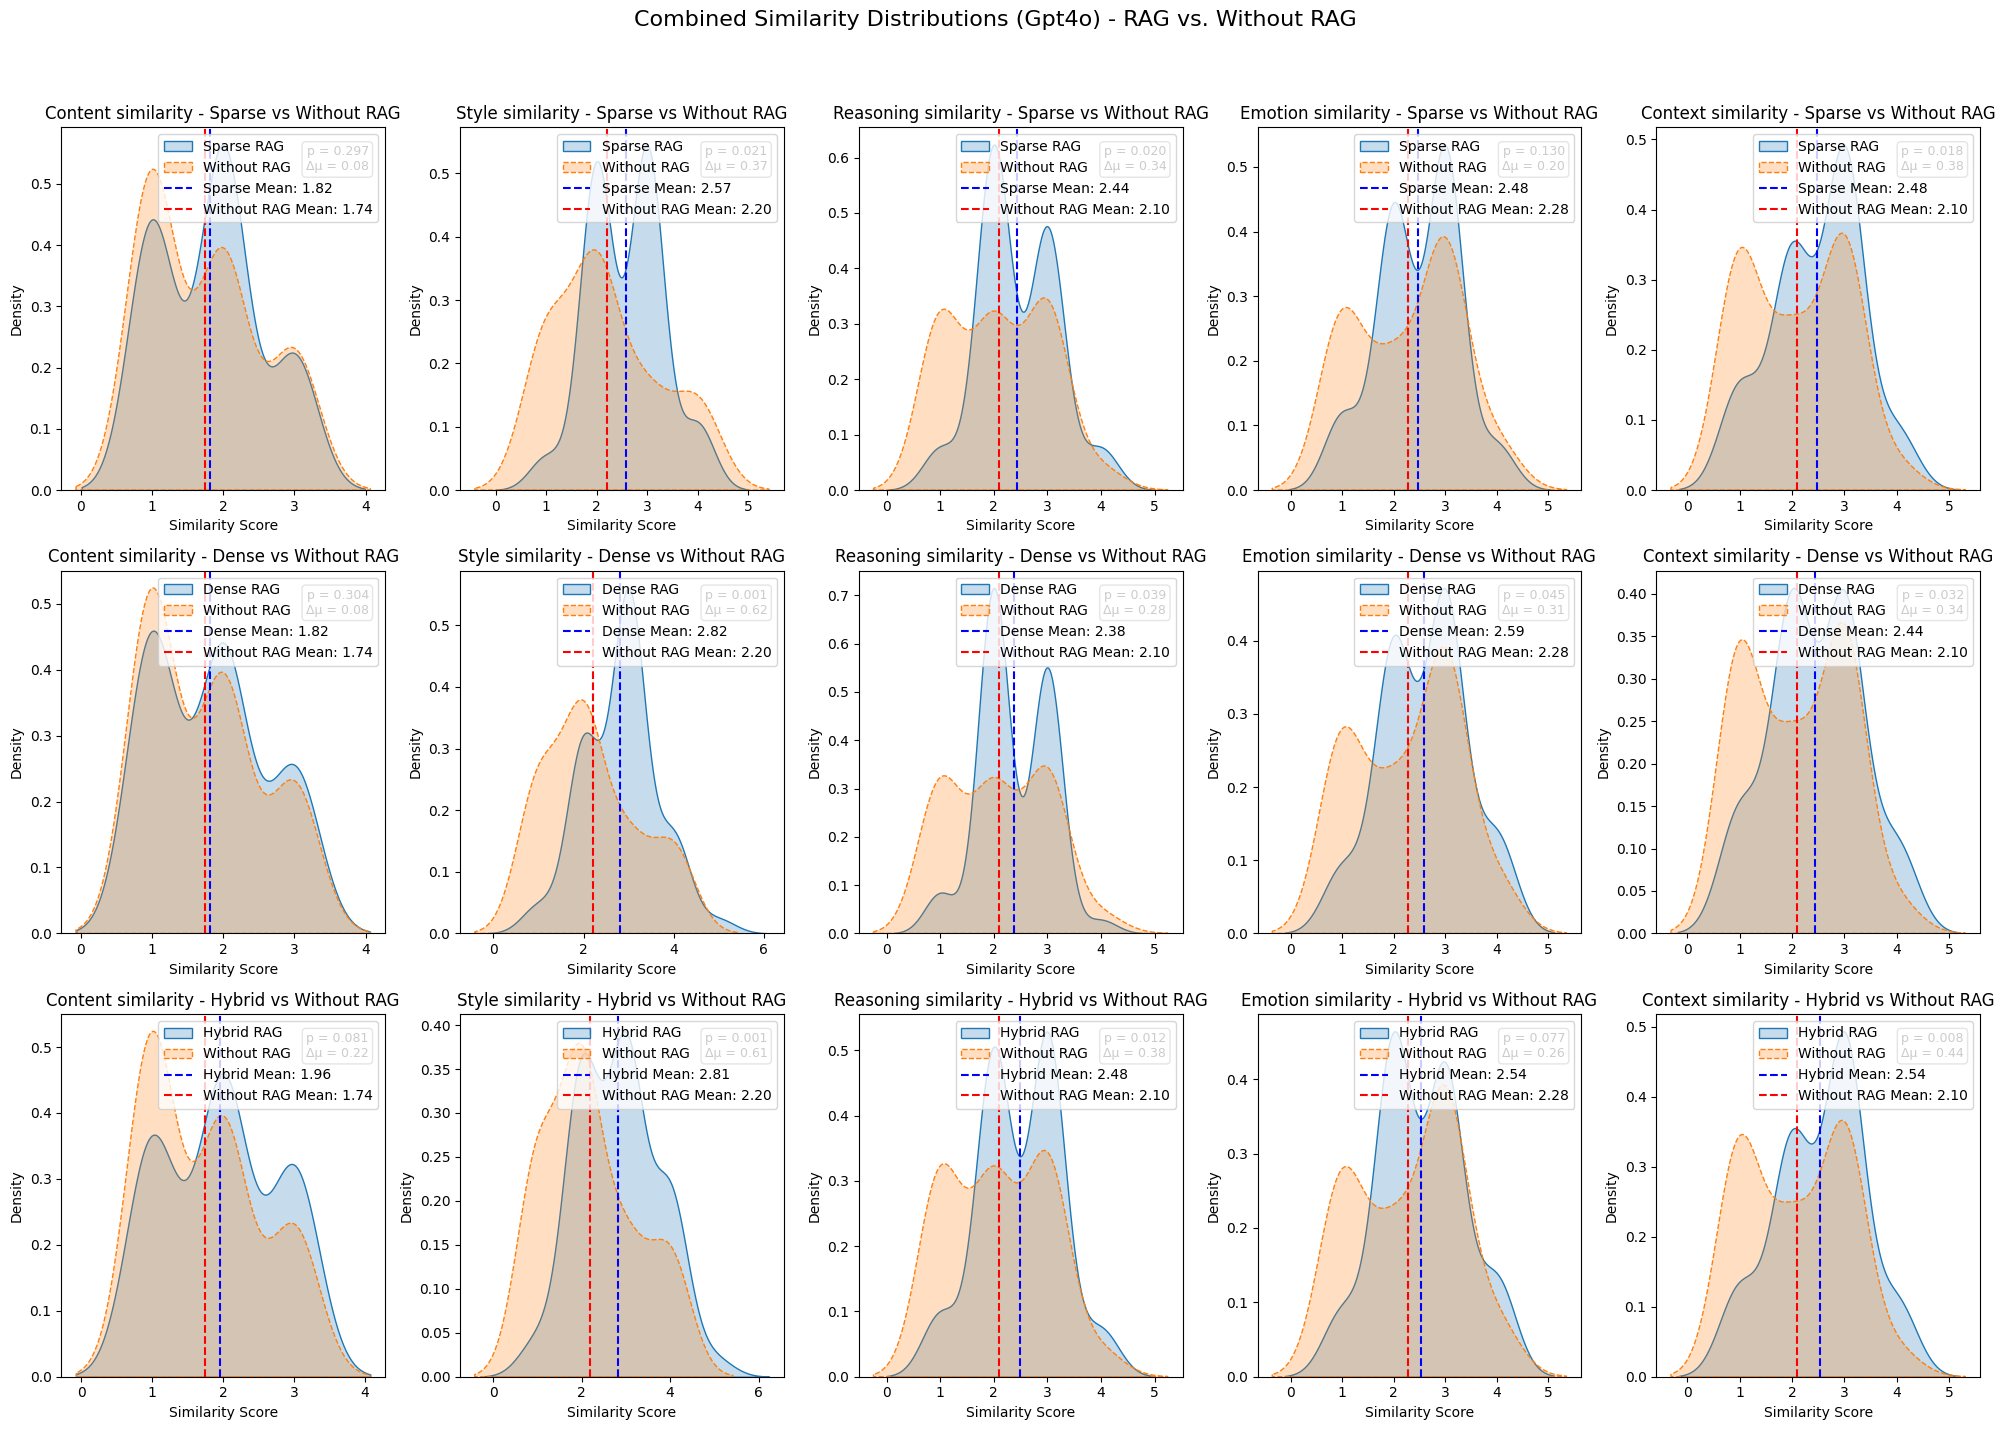


Combined P-Values and Mean Differences for RAG vs. Non-RAG (Gpt4o - All Data Across Candidates):
Content similarity - Sparse vs. Without RAG: p-value = 0.297, Δμ = 0.08
Style similarity - Sparse vs. Without RAG: p-value = 0.021, Δμ = 0.37
Reasoning similarity - Sparse vs. Without RAG: p-value = 0.020, Δμ = 0.34
Emotion similarity - Sparse vs. Without RAG: p-value = 0.130, Δμ = 0.20
Context similarity - Sparse vs. Without RAG: p-value = 0.018, Δμ = 0.38
Content similarity - Dense vs. Without RAG: p-value = 0.304, Δμ = 0.08
Style similarity - Dense vs. Without RAG: p-value = 0.001, Δμ = 0.62
Reasoning similarity - Dense vs. Without RAG: p-value = 0.039, Δμ = 0.28
Emotion similarity - Dense vs. Without RAG: p-value = 0.045, Δμ = 0.31
Context similarity - Dense vs. Without RAG: p-value = 0.032, Δμ = 0.34
Content similarity - Hybrid vs. Without RAG: p-value = 0.081, Δμ = 0.22
Style similarity - Hybrid vs. Without RAG: p-value = 0.001, Δμ = 0.61
Reasoning similarity - Hybrid vs. Without RAG

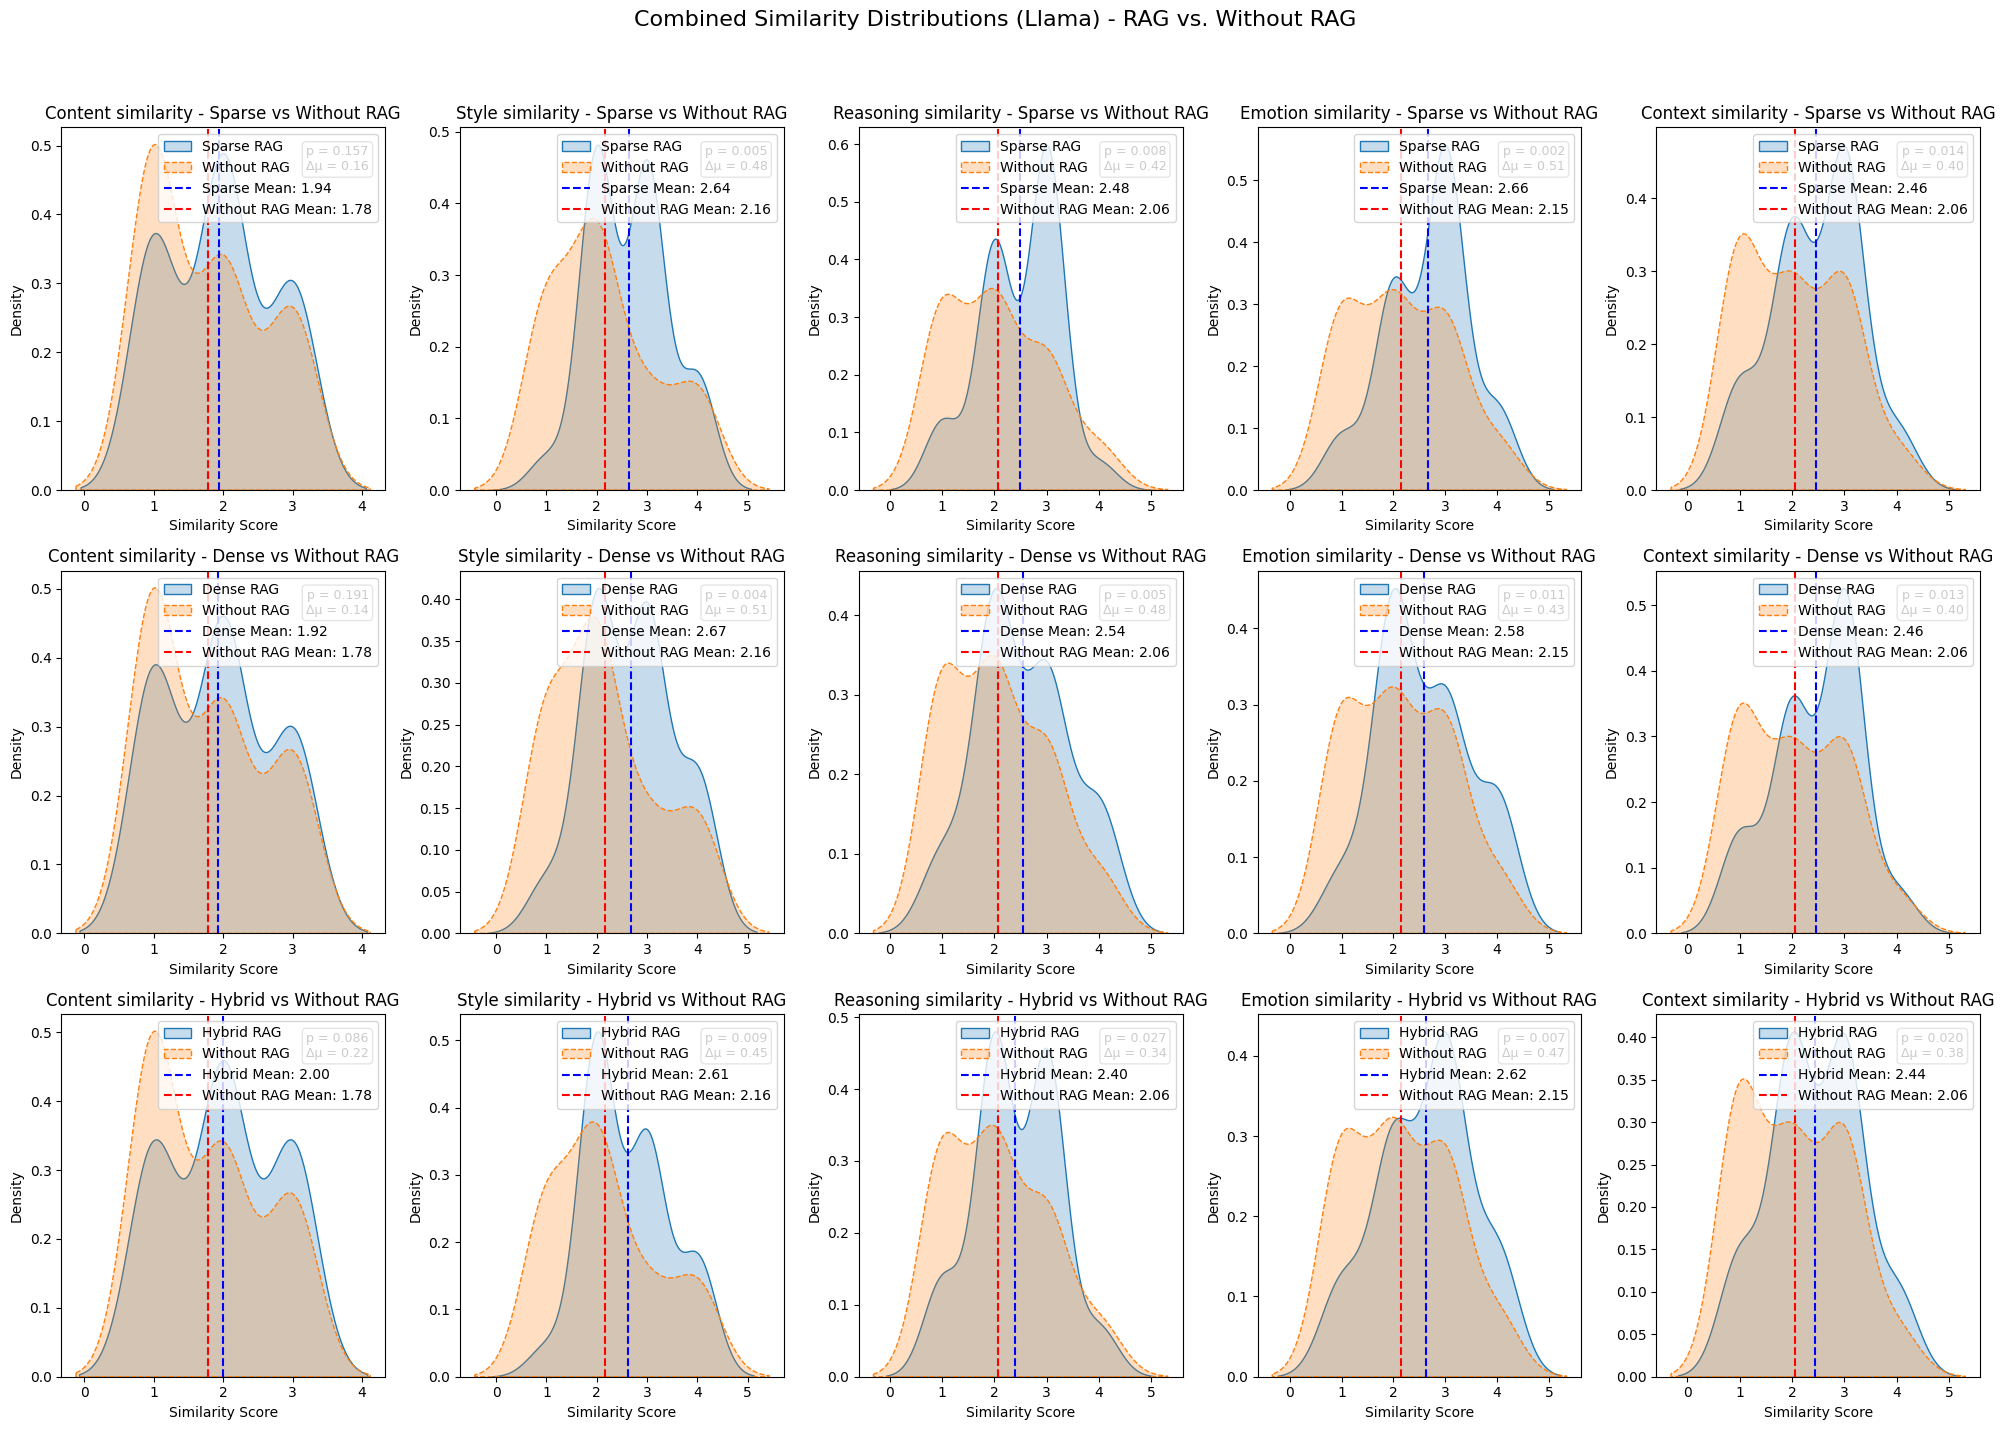


Combined P-Values and Mean Differences for RAG vs. Non-RAG (Llama - All Data Across Candidates):
Content similarity - Sparse vs. Without RAG: p-value = 0.157, Δμ = 0.16
Style similarity - Sparse vs. Without RAG: p-value = 0.005, Δμ = 0.48
Reasoning similarity - Sparse vs. Without RAG: p-value = 0.008, Δμ = 0.42
Emotion similarity - Sparse vs. Without RAG: p-value = 0.002, Δμ = 0.51
Context similarity - Sparse vs. Without RAG: p-value = 0.014, Δμ = 0.40
Content similarity - Dense vs. Without RAG: p-value = 0.191, Δμ = 0.14
Style similarity - Dense vs. Without RAG: p-value = 0.004, Δμ = 0.51
Reasoning similarity - Dense vs. Without RAG: p-value = 0.005, Δμ = 0.48
Emotion similarity - Dense vs. Without RAG: p-value = 0.011, Δμ = 0.43
Context similarity - Dense vs. Without RAG: p-value = 0.013, Δμ = 0.40
Content similarity - Hybrid vs. Without RAG: p-value = 0.086, Δμ = 0.22
Style similarity - Hybrid vs. Without RAG: p-value = 0.009, Δμ = 0.45
Reasoning similarity - Hybrid vs. Without RAG

In [21]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define the directories for GPT-4o and Llama
directories = {
    "gpt4o": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/gpt4o",
    "llama": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/llama"
}

# Loop through each directory
for model_name, directory in directories.items():
    # Initialize lists to store the extracted data
    data = []

    # Load data based on the new schema without exclusions
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            # Determine RAG type from filename
            if "without_RAG" in filename:
                rag_type = "without_RAG"
            elif "sparse" in filename:
                rag_type = "sparse"
            elif "dense" in filename:
                rag_type = "dense"
            elif "hybrid" in filename:
                rag_type = "hybrid"
            else:
                continue  # Skip any files that don’t match expected RAG types

            file_path = os.path.join(directory, filename)

            # Load JSON file
            with open(file_path, 'r') as f:
                json_data = json.load(f)

                # Process each item in the JSON file
                for item in json_data:
                    candidate = item.get("candidate", "")

                    # Extract similarity scores from each dimension in evaluations
                    for dimension in ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]:
                        similarity = item.get("evaluations", {}).get(dimension, {}).get("Similarity")

                        # Only proceed if similarity score is present
                        if similarity is not None:
                            # Convert similarity score of 6 to 5
                            if similarity == 6:
                                similarity = 5
                            data.append({
                                "candidate": candidate,
                                "rag_type": rag_type,
                                "dimension": dimension,
                                "similarity": similarity
                            })

    # Convert data to a DataFrame for analysis
    df = pd.DataFrame(data)

    # Define RAG types and dimensions (excluding candidates for combined analysis)
    rag_types = ["sparse", "dense", "hybrid"]
    dimensions = ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]

    # Dictionary to store p-values and mean differences for each comparison
    results = {}

    # Set up combined analysis (all data without candidate split)
    fig_combined, axes_combined = plt.subplots(len(rag_types), len(dimensions), figsize=(20, 15))
    fig_combined.suptitle(f"Combined Similarity Distributions ({model_name.capitalize()}) - RAG vs. Without RAG", fontsize=16)

    for i, rag_type in enumerate(rag_types):
        for j, dimension in enumerate(dimensions):
            ax = axes_combined[i, j]

            # Filter data for this RAG method and dimension across all candidates
            rag_subset = df[(df["rag_type"] == rag_type) & (df["dimension"] == dimension)]
            non_rag_subset = df[(df["rag_type"] == "without_RAG") & (df["dimension"] == dimension)]

            # Plot distributions
            sns.kdeplot(rag_subset["similarity"], label=f"{rag_type.capitalize()} RAG", fill=True, ax=ax)
            sns.kdeplot(non_rag_subset["similarity"], label="Without RAG", fill=True, linestyle="--", ax=ax)

            # Calculate and plot means
            rag_mean = rag_subset["similarity"].mean()
            non_rag_mean = non_rag_subset["similarity"].mean()
            mean_diff = rag_mean - non_rag_mean  # Calculate mean difference

            if not pd.isna(rag_mean):
                ax.axvline(rag_mean, linestyle="--", color="blue", label=f"{rag_type.capitalize()} Mean: {rag_mean:.2f}")
            if not pd.isna(non_rag_mean):
                ax.axvline(non_rag_mean, linestyle="--", color="red", label=f"Without RAG Mean: {non_rag_mean:.2f}")

            # One-sided t-test p-value (alternative='greater' for one-sided test)
            t_stat, p_val = ttest_ind(
                rag_subset["similarity"].dropna(),
                non_rag_subset["similarity"].dropna(),
                alternative='greater'
            )
            # Store p-value and mean difference for combined analysis
            results[(dimension, rag_type)] = (p_val, mean_diff)

            # Plot settings
            ax.set_title(f"{dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs Without RAG")
            ax.set_xlabel("Similarity Score")
            ax.set_ylabel("Density")
            ax.legend()

            # Optionally, display p-value and mean difference on the plot
            ax.text(0.95, 0.95, f"p = {p_val:.3f}\nΔμ = {mean_diff:.2f}",
                    transform=ax.transAxes, horizontalalignment='right', verticalalignment='top',
                    fontsize=9, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Print p-values and mean differences for combined analysis
    print(f"\nCombined P-Values and Mean Differences for RAG vs. Non-RAG ({model_name.capitalize()} - All Data Across Candidates):")
    for (dimension, rag_type), (p_val, mean_diff) in results.items():
        print(f"{dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs. Without RAG: p-value = {p_val:.3f}, Δμ = {mean_diff:.2f}")


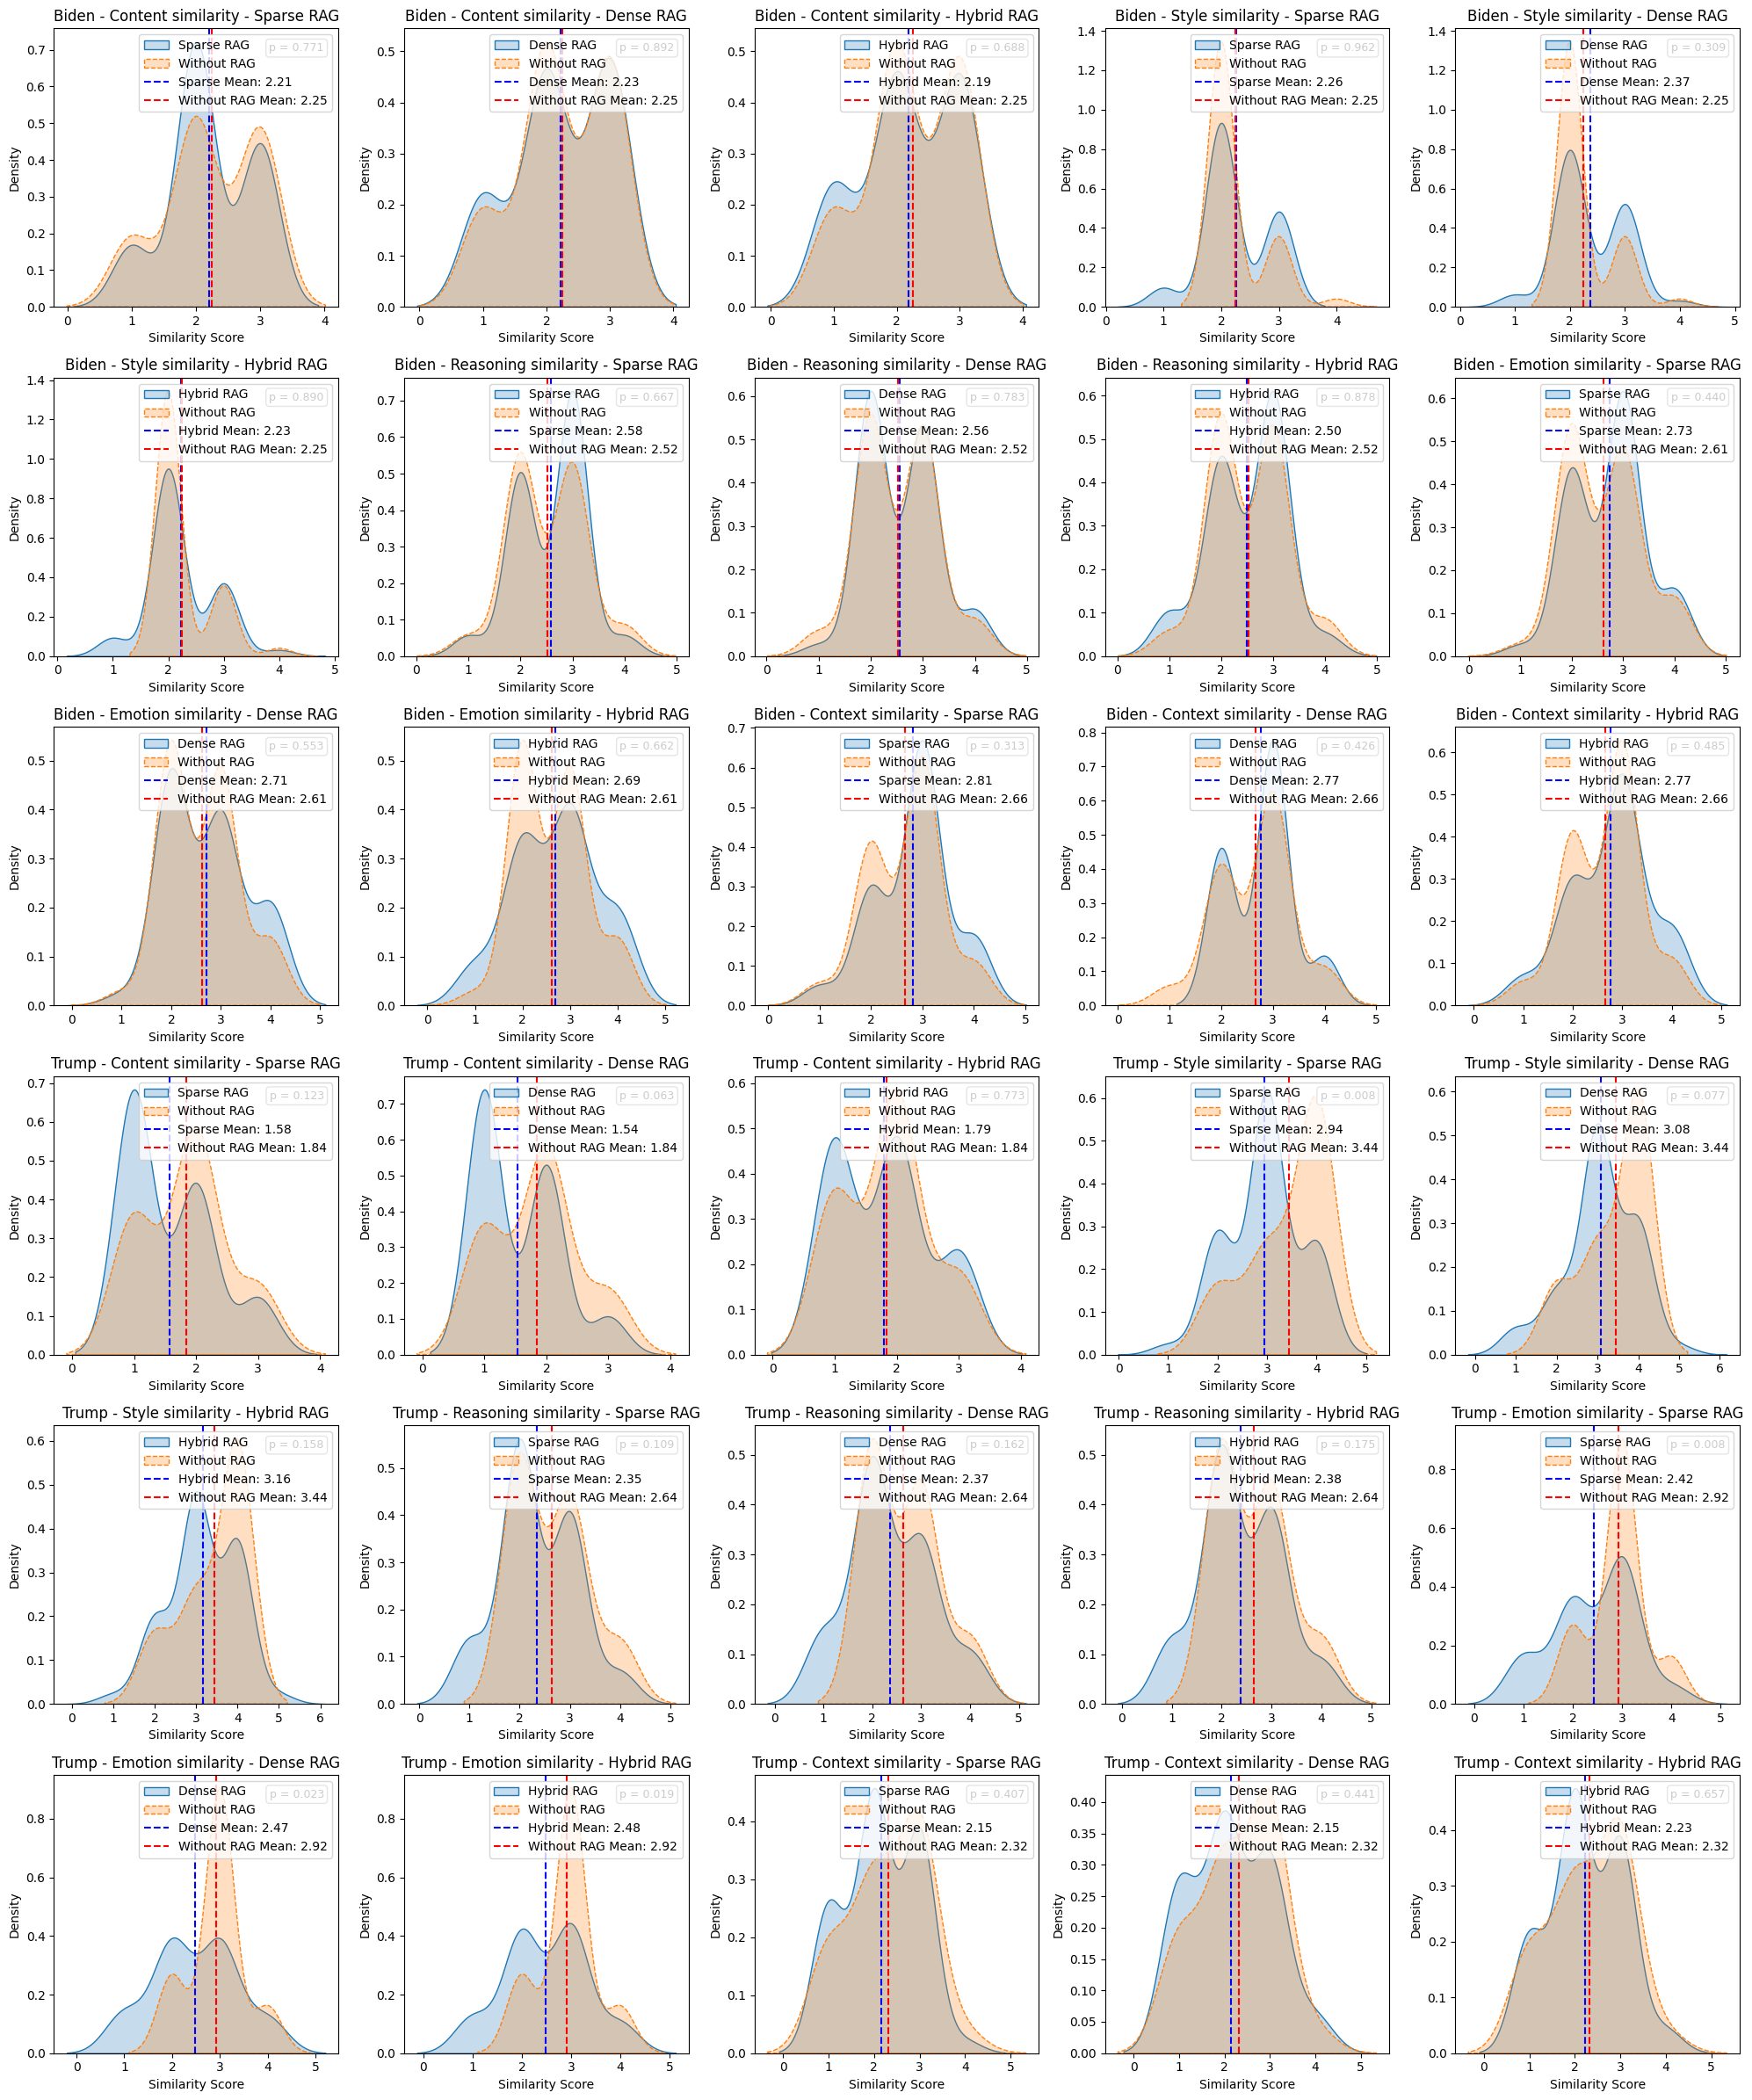


P-Values for RAG vs. Non-RAG Comparison by Candidate and Dimension:
Biden - Content similarity - Sparse vs. Without RAG: p-value = 0.771
Biden - Content similarity - Dense vs. Without RAG: p-value = 0.892
Biden - Content similarity - Hybrid vs. Without RAG: p-value = 0.688
Biden - Style similarity - Sparse vs. Without RAG: p-value = 0.962
Biden - Style similarity - Dense vs. Without RAG: p-value = 0.309
Biden - Style similarity - Hybrid vs. Without RAG: p-value = 0.890
Biden - Reasoning similarity - Sparse vs. Without RAG: p-value = 0.667
Biden - Reasoning similarity - Dense vs. Without RAG: p-value = 0.783
Biden - Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.878
Biden - Emotion similarity - Sparse vs. Without RAG: p-value = 0.440
Biden - Emotion similarity - Dense vs. Without RAG: p-value = 0.553
Biden - Emotion similarity - Hybrid vs. Without RAG: p-value = 0.662
Biden - Context similarity - Sparse vs. Without RAG: p-value = 0.313
Biden - Context similarity - Dense vs.

In [18]:
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define the directory containing the JSON files
directory = "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions"

# Initialize lists to store the extracted data
data = []

# Regex patterns for filtering responses
exclude_start = re.compile(r"^I cannot provide a response")
exclude_end_1 = re.compile(r"Is there something else I can help you with\?$")
exclude_end_2 = re.compile(r"Is there anything else I can help you with\?$")

# Load and filter data based on the new schema
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        # Handle different filename structures for RAG and non-RAG cases
        if "without_RAG" in filename:
            rag_type = "without_RAG"
        elif "sparse" in filename:
            rag_type = "sparse"
        elif "dense" in filename:
            rag_type = "dense"
        elif "hybrid" in filename:
            rag_type = "hybrid"
        else:
            continue  # Skip any files that don’t match expected RAG types

        file_path = os.path.join(directory, filename)

        # Load JSON file
        with open(file_path, 'r') as f:
            json_data = json.load(f)

            # Iterate through each item in the JSON file
            for item in json_data:
                candidate = item.get("candidate", "")
                generated_response = item.get("generated_response", {}).get("Meta-Llama-3.1-8B-Instruct", "")

                # Apply the filter criteria
                if (exclude_start.match(generated_response) or
                    exclude_end_1.search(generated_response) or
                    exclude_end_2.search(generated_response)):
                    continue

                # Extract similarity scores from each dimension in evaluations
                for dimension in ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]:
                    similarity = item.get("evaluations", {}).get(dimension, {}).get("Similarity")

                    # Only proceed if similarity score is present
                    if similarity is not None:
                        # Convert similarity score of 6 to 5
                        if similarity == 6:
                            similarity = 5
                        data.append({
                            "candidate": candidate,
                            "rag_type": rag_type,
                            "dimension": dimension,
                            "similarity": similarity
                        })

# Convert data to a DataFrame for analysis
df = pd.DataFrame(data)

# Define candidates, RAG types, and dimensions
candidates = df["candidate"].unique()
rag_types = ["sparse", "dense", "hybrid"]
dimensions = ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]

# Dictionary to store p-values for easier reading outside the plot
p_values = {}

# Total number of subplots
total_subplots = len(candidates) * len(dimensions) * len(rag_types)

# Determine grid size for subplots
cols = 5  # Adjust as needed for readability
rows = (total_subplots + cols - 1) // cols

# Set up the overall figure size
plt.figure(figsize=(20, rows * 4))

plot_idx = 1  # Initialize subplot index

# Loop over candidates, dimensions, and RAG types
for candidate in candidates:
    for dimension in dimensions:
        for rag_type in rag_types:
            # Create subplot
            ax = plt.subplot(rows, cols, plot_idx)
            plot_idx += 1

            # Filter data for the current candidate, dimension, and RAG type
            rag_subset = df[(df["candidate"] == candidate) & (df["dimension"] == dimension) & (df["rag_type"] == rag_type)]
            non_rag_subset = df[(df["candidate"] == candidate) & (df["dimension"] == dimension) & (df["rag_type"] == "without_RAG")]

            # Check if data exists
            if rag_subset.empty or non_rag_subset.empty:
                continue  # Skip if no data

            # Plot distributions
            sns.kdeplot(rag_subset["similarity"], label=f"{rag_type.capitalize()} RAG", fill=True, ax=ax)
            sns.kdeplot(non_rag_subset["similarity"], label="Without RAG", fill=True, linestyle="--", ax=ax)

            # Calculate and plot means
            rag_mean = rag_subset["similarity"].mean()
            non_rag_mean = non_rag_subset["similarity"].mean()

            if not pd.isna(rag_mean):
                ax.axvline(rag_mean, linestyle="--", color="blue", label=f"{rag_type.capitalize()} Mean: {rag_mean:.2f}")
            if not pd.isna(non_rag_mean):
                ax.axvline(non_rag_mean, linestyle="--", color="red", label=f"Without RAG Mean: {non_rag_mean:.2f}")

            # T-test p-value
            t_stat, p_val = ttest_ind(rag_subset["similarity"].dropna(), non_rag_subset["similarity"].dropna())
            p_values[(candidate, dimension, rag_type)] = p_val  # Store p-value

            # Plot settings
            ax.set_title(f"{candidate.capitalize()} - {dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} RAG")
            ax.set_xlabel("Similarity Score")
            ax.set_ylabel("Density")
            ax.legend()

            # Optionally, display p-value on the plot
            ax.text(0.95, 0.95, f"p = {p_val:.3f}", transform=ax.transAxes, horizontalalignment='right', verticalalignment='top', fontsize=9, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.tight_layout()
plt.show()

# Print p-values for each candidate, dimension, and RAG method
print("\nP-Values for RAG vs. Non-RAG Comparison by Candidate and Dimension:")
for (candidate, dimension, rag_type), p_val in p_values.items():
    print(f"{candidate.capitalize()} - {dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs. Without RAG: p-value = {p_val:.3f}")


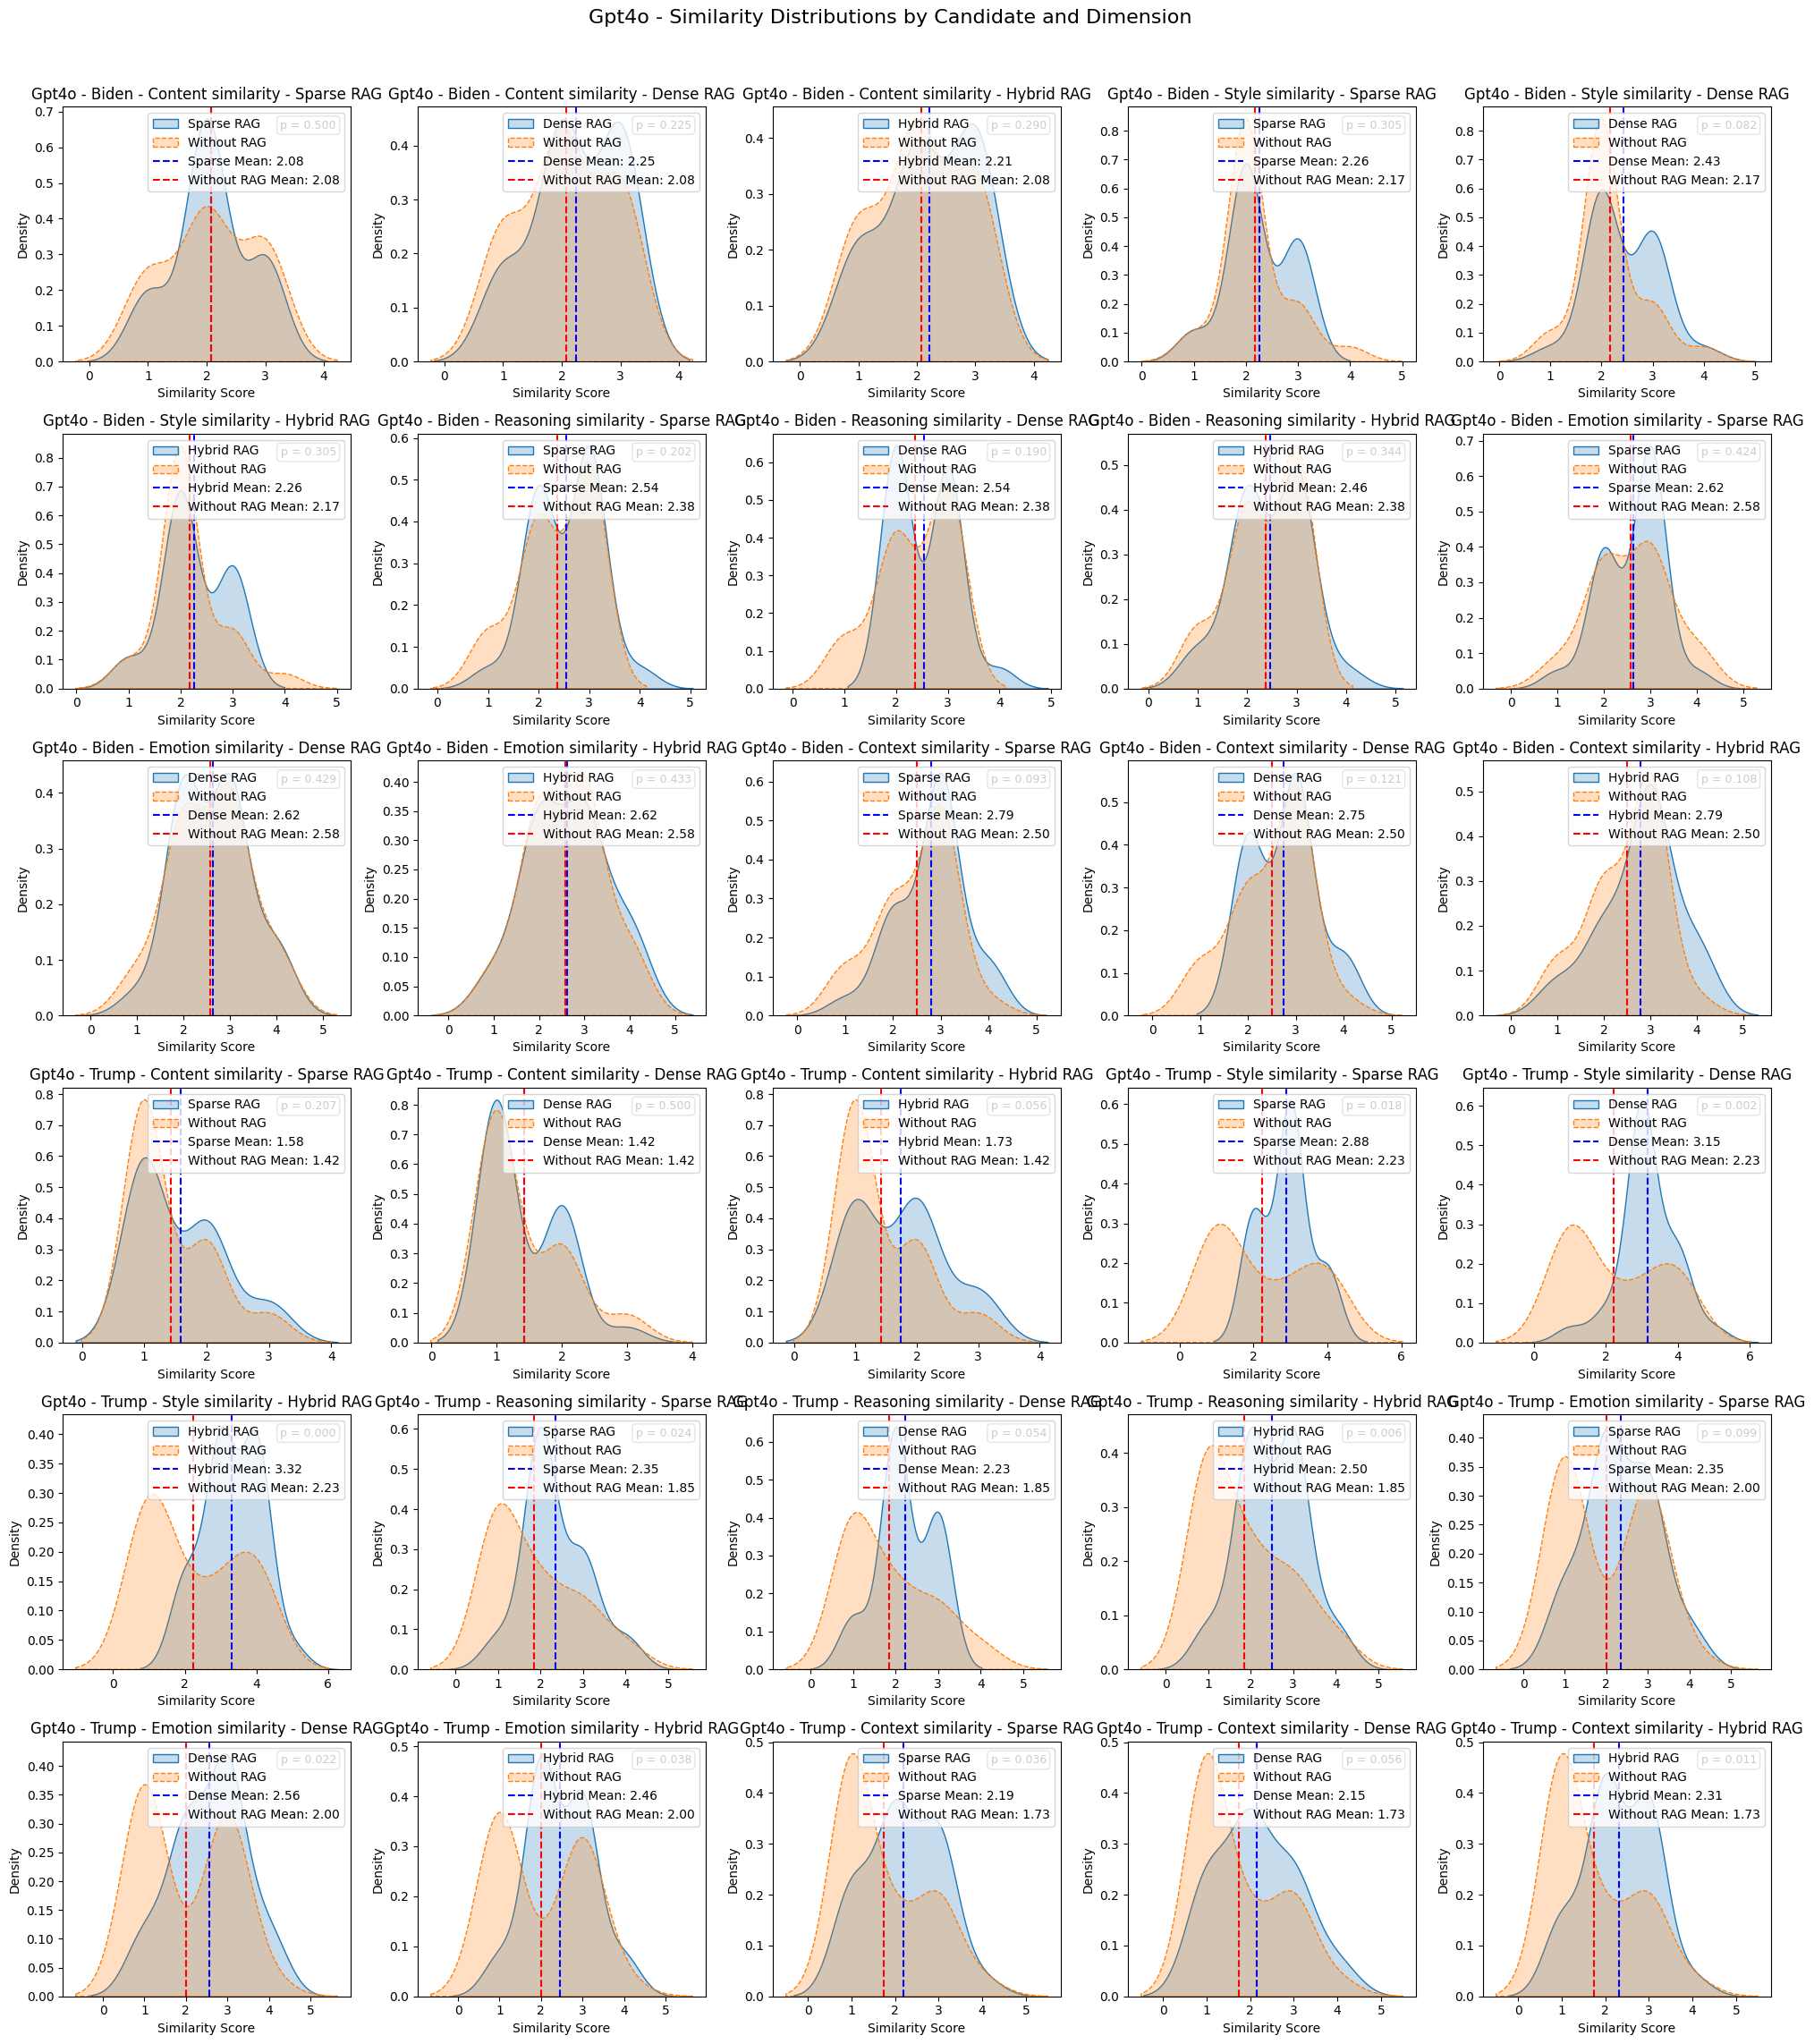


P-Values for RAG vs. Non-RAG Comparison by Candidate and Dimension (Gpt4o):
Biden - Content similarity - Sparse vs. Without RAG: p-value = 0.500
Biden - Content similarity - Dense vs. Without RAG: p-value = 0.225
Biden - Content similarity - Hybrid vs. Without RAG: p-value = 0.290
Biden - Style similarity - Sparse vs. Without RAG: p-value = 0.305
Biden - Style similarity - Dense vs. Without RAG: p-value = 0.082
Biden - Style similarity - Hybrid vs. Without RAG: p-value = 0.305
Biden - Reasoning similarity - Sparse vs. Without RAG: p-value = 0.202
Biden - Reasoning similarity - Dense vs. Without RAG: p-value = 0.190
Biden - Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.344
Biden - Emotion similarity - Sparse vs. Without RAG: p-value = 0.424
Biden - Emotion similarity - Dense vs. Without RAG: p-value = 0.429
Biden - Emotion similarity - Hybrid vs. Without RAG: p-value = 0.433
Biden - Context similarity - Sparse vs. Without RAG: p-value = 0.093
Biden - Context similarity - D

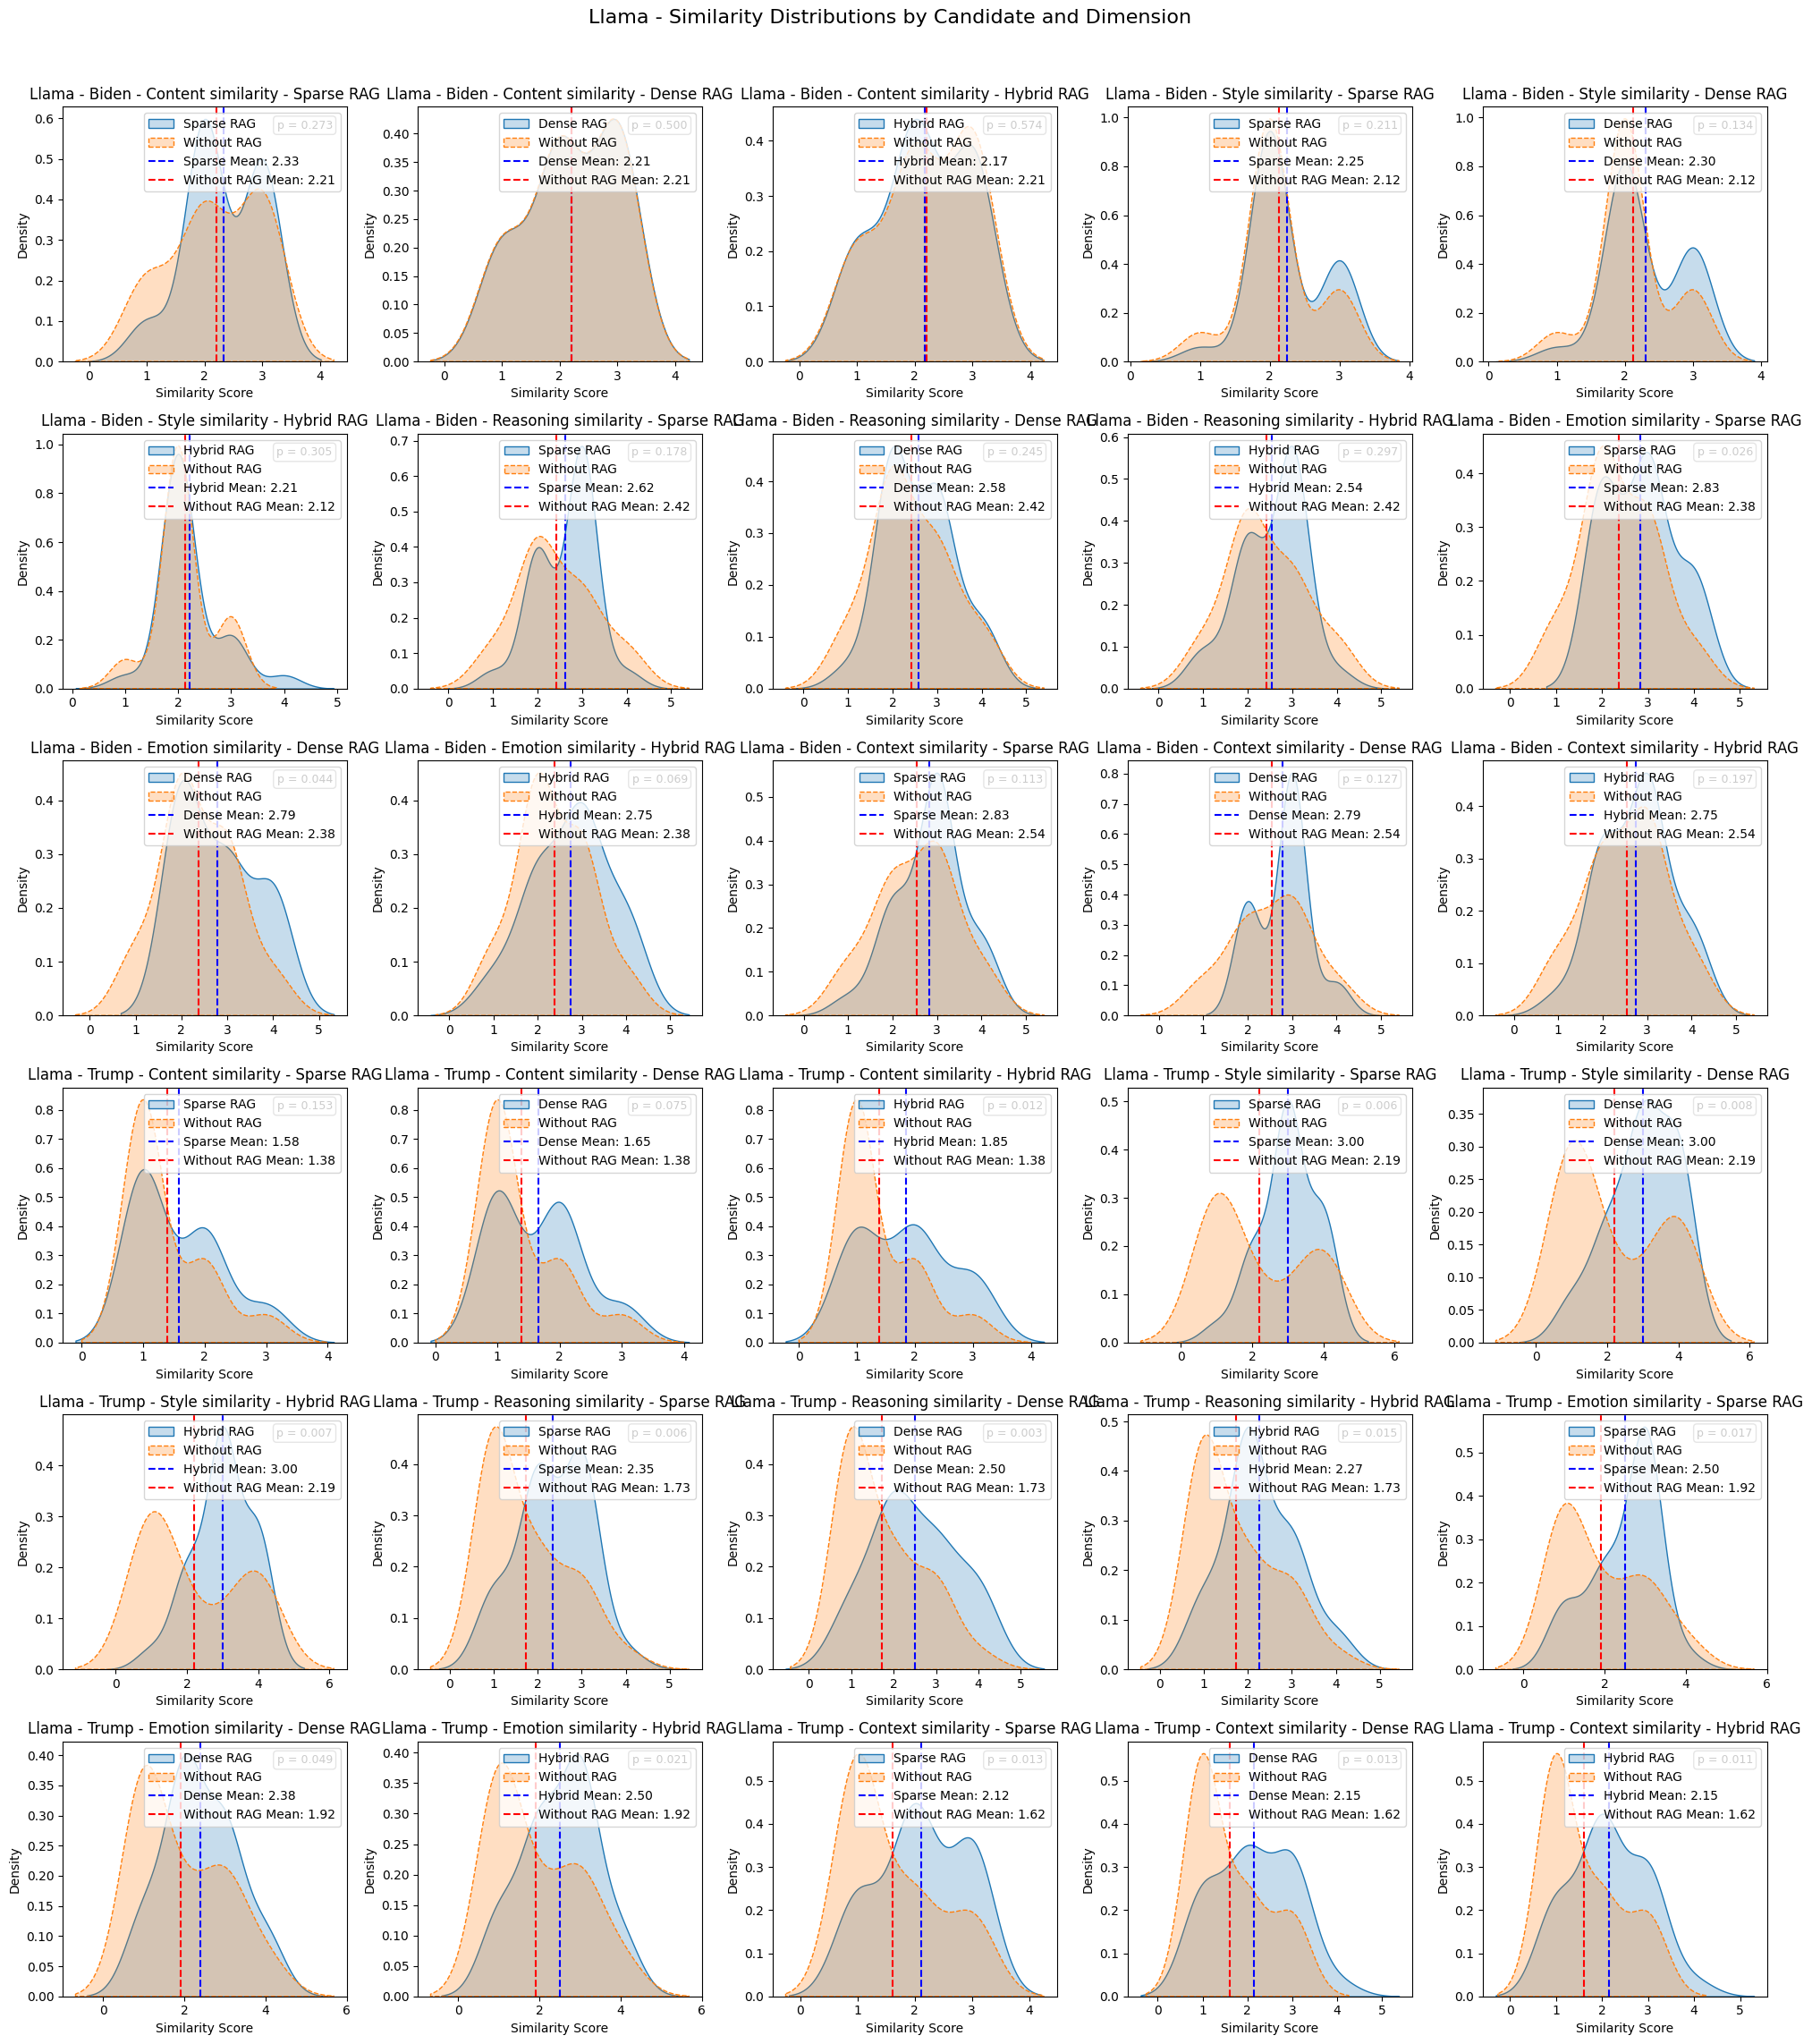


P-Values for RAG vs. Non-RAG Comparison by Candidate and Dimension (Llama):
Biden - Content similarity - Sparse vs. Without RAG: p-value = 0.273
Biden - Content similarity - Dense vs. Without RAG: p-value = 0.500
Biden - Content similarity - Hybrid vs. Without RAG: p-value = 0.574
Biden - Style similarity - Sparse vs. Without RAG: p-value = 0.211
Biden - Style similarity - Dense vs. Without RAG: p-value = 0.134
Biden - Style similarity - Hybrid vs. Without RAG: p-value = 0.305
Biden - Reasoning similarity - Sparse vs. Without RAG: p-value = 0.178
Biden - Reasoning similarity - Dense vs. Without RAG: p-value = 0.245
Biden - Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.297
Biden - Emotion similarity - Sparse vs. Without RAG: p-value = 0.026
Biden - Emotion similarity - Dense vs. Without RAG: p-value = 0.044
Biden - Emotion similarity - Hybrid vs. Without RAG: p-value = 0.069
Biden - Context similarity - Sparse vs. Without RAG: p-value = 0.113
Biden - Context similarity - D

In [19]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define directories for GPT-4o and Llama
directories = {
    "gpt4o": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/gpt4o",
    "llama": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/llama"
}

# Loop through each directory for independent analysis
for model_name, directory in directories.items():
    # Initialize lists to store the extracted data
    data = []

    # Load data without exclusions
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            # Determine RAG type from filename
            if "without_RAG" in filename:
                rag_type = "without_RAG"
            elif "sparse" in filename:
                rag_type = "sparse"
            elif "dense" in filename:
                rag_type = "dense"
            elif "hybrid" in filename:
                rag_type = "hybrid"
            else:
                continue  # Skip any files that don’t match expected RAG types

            file_path = os.path.join(directory, filename)

            # Load JSON file
            with open(file_path, 'r') as f:
                json_data = json.load(f)

                # Process each item in the JSON file
                for item in json_data:
                    candidate = item.get("candidate", "")

                    # Extract similarity scores from each dimension in evaluations
                    for dimension in ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]:
                        similarity = item.get("evaluations", {}).get(dimension, {}).get("Similarity")

                        # Only proceed if similarity score is present
                        if similarity is not None:
                            # Convert similarity score of 6 to 5
                            if similarity == 6:
                                similarity = 5
                            data.append({
                                "candidate": candidate,
                                "rag_type": rag_type,
                                "dimension": dimension,
                                "similarity": similarity
                            })

    # Convert data to a DataFrame for analysis
    df = pd.DataFrame(data)

    # Define candidates, RAG types, and dimensions
    candidates = df["candidate"].unique()
    rag_types = ["sparse", "dense", "hybrid"]
    dimensions = ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]

    # Dictionary to store p-values for easier reading outside the plot
    p_values = {}

    # Total number of subplots
    total_subplots = len(candidates) * len(dimensions) * len(rag_types)

    # Determine grid size for subplots
    cols = 5  # Adjust as needed for readability
    rows = (total_subplots + cols - 1) // cols

    # Set up the overall figure size
    plt.figure(figsize=(20, rows * 4))

    plot_idx = 1  # Initialize subplot index

    # Loop over candidates, dimensions, and RAG types
    for candidate in candidates:
        for dimension in dimensions:
            for rag_type in rag_types:
                # Create subplot
                ax = plt.subplot(rows, cols, plot_idx)
                plot_idx += 1

                # Filter data for the current candidate, dimension, and RAG type
                rag_subset = df[(df["candidate"] == candidate) & (df["dimension"] == dimension) & (df["rag_type"] == rag_type)]
                non_rag_subset = df[(df["candidate"] == candidate) & (df["dimension"] == dimension) & (df["rag_type"] == "without_RAG")]

                # Check if data exists
                if rag_subset.empty or non_rag_subset.empty:
                    continue  # Skip if no data

                # Plot distributions
                sns.kdeplot(rag_subset["similarity"], label=f"{rag_type.capitalize()} RAG", fill=True, ax=ax)
                sns.kdeplot(non_rag_subset["similarity"], label="Without RAG", fill=True, linestyle="--", ax=ax)

                # Calculate and plot means
                rag_mean = rag_subset["similarity"].mean()
                non_rag_mean = non_rag_subset["similarity"].mean()

                if not pd.isna(rag_mean):
                    ax.axvline(rag_mean, linestyle="--", color="blue", label=f"{rag_type.capitalize()} Mean: {rag_mean:.2f}")
                if not pd.isna(non_rag_mean):
                    ax.axvline(non_rag_mean, linestyle="--", color="red", label=f"Without RAG Mean: {non_rag_mean:.2f}")

                # One-sided t-test p-value (alternative='greater' for one-sided test)
                t_stat, p_val = ttest_ind(
                    rag_subset["similarity"].dropna(),
                    non_rag_subset["similarity"].dropna(),
                    alternative='greater'
                )
                p_values[(candidate, dimension, rag_type)] = p_val  # Store p-value

                # Plot settings
                ax.set_title(f"{model_name.capitalize()} - {candidate.capitalize()} - {dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} RAG")
                ax.set_xlabel("Similarity Score")
                ax.set_ylabel("Density")
                ax.legend()

                # Optionally, display p-value on the plot
                ax.text(0.95, 0.95, f"p = {p_val:.3f}", transform=ax.transAxes, horizontalalignment='right', verticalalignment='top', fontsize=9, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(f"{model_name.capitalize()} - Similarity Distributions by Candidate and Dimension", fontsize=16)
    plt.show()

    # Print p-values for each candidate, dimension, and RAG method
    print(f"\nP-Values for RAG vs. Non-RAG Comparison by Candidate and Dimension ({model_name.capitalize()}):")
    for (candidate, dimension, rag_type), p_val in p_values.items():
        print(f"{candidate.capitalize()} - {dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs. Without RAG: p-value = {p_val:.3f}")


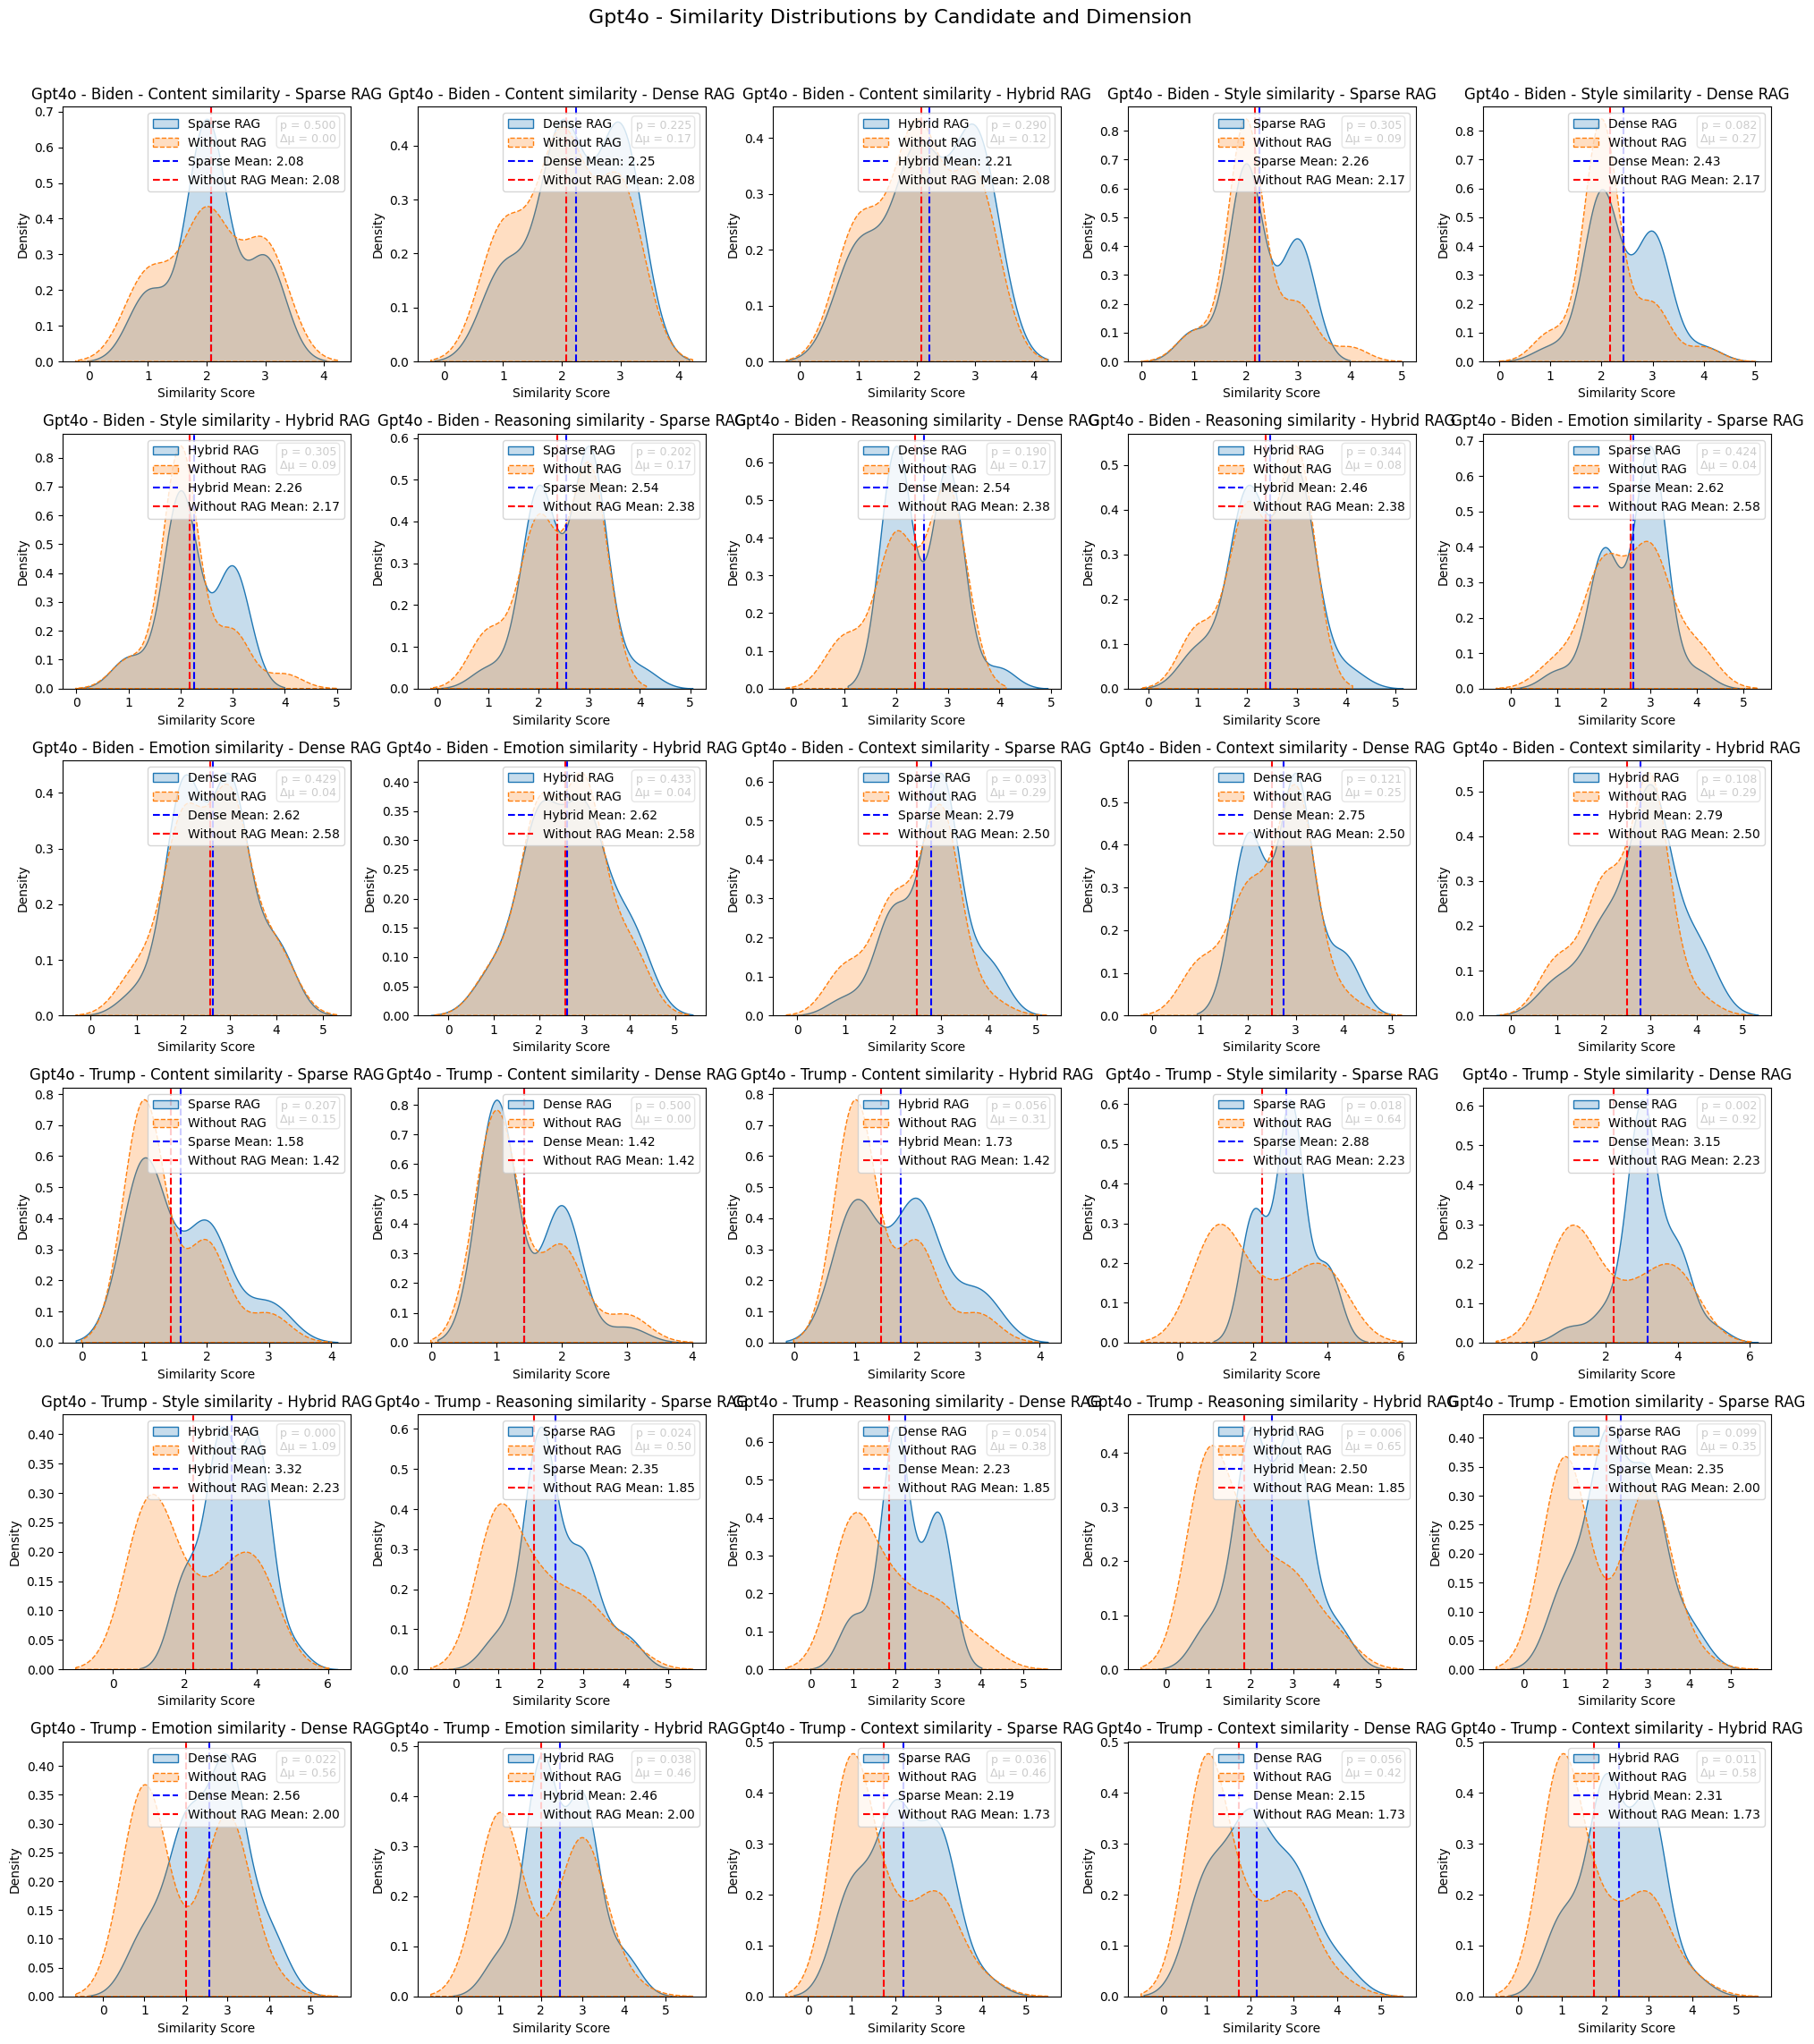


P-Values and Mean Differences for RAG vs. Non-RAG Comparison by Candidate and Dimension (Gpt4o):
Biden - Content similarity - Sparse vs. Without RAG: p-value = 0.500, Δμ = 0.00
Biden - Content similarity - Dense vs. Without RAG: p-value = 0.225, Δμ = 0.17
Biden - Content similarity - Hybrid vs. Without RAG: p-value = 0.290, Δμ = 0.12
Biden - Style similarity - Sparse vs. Without RAG: p-value = 0.305, Δμ = 0.09
Biden - Style similarity - Dense vs. Without RAG: p-value = 0.082, Δμ = 0.27
Biden - Style similarity - Hybrid vs. Without RAG: p-value = 0.305, Δμ = 0.09
Biden - Reasoning similarity - Sparse vs. Without RAG: p-value = 0.202, Δμ = 0.17
Biden - Reasoning similarity - Dense vs. Without RAG: p-value = 0.190, Δμ = 0.17
Biden - Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.344, Δμ = 0.08
Biden - Emotion similarity - Sparse vs. Without RAG: p-value = 0.424, Δμ = 0.04
Biden - Emotion similarity - Dense vs. Without RAG: p-value = 0.429, Δμ = 0.04
Biden - Emotion similarity

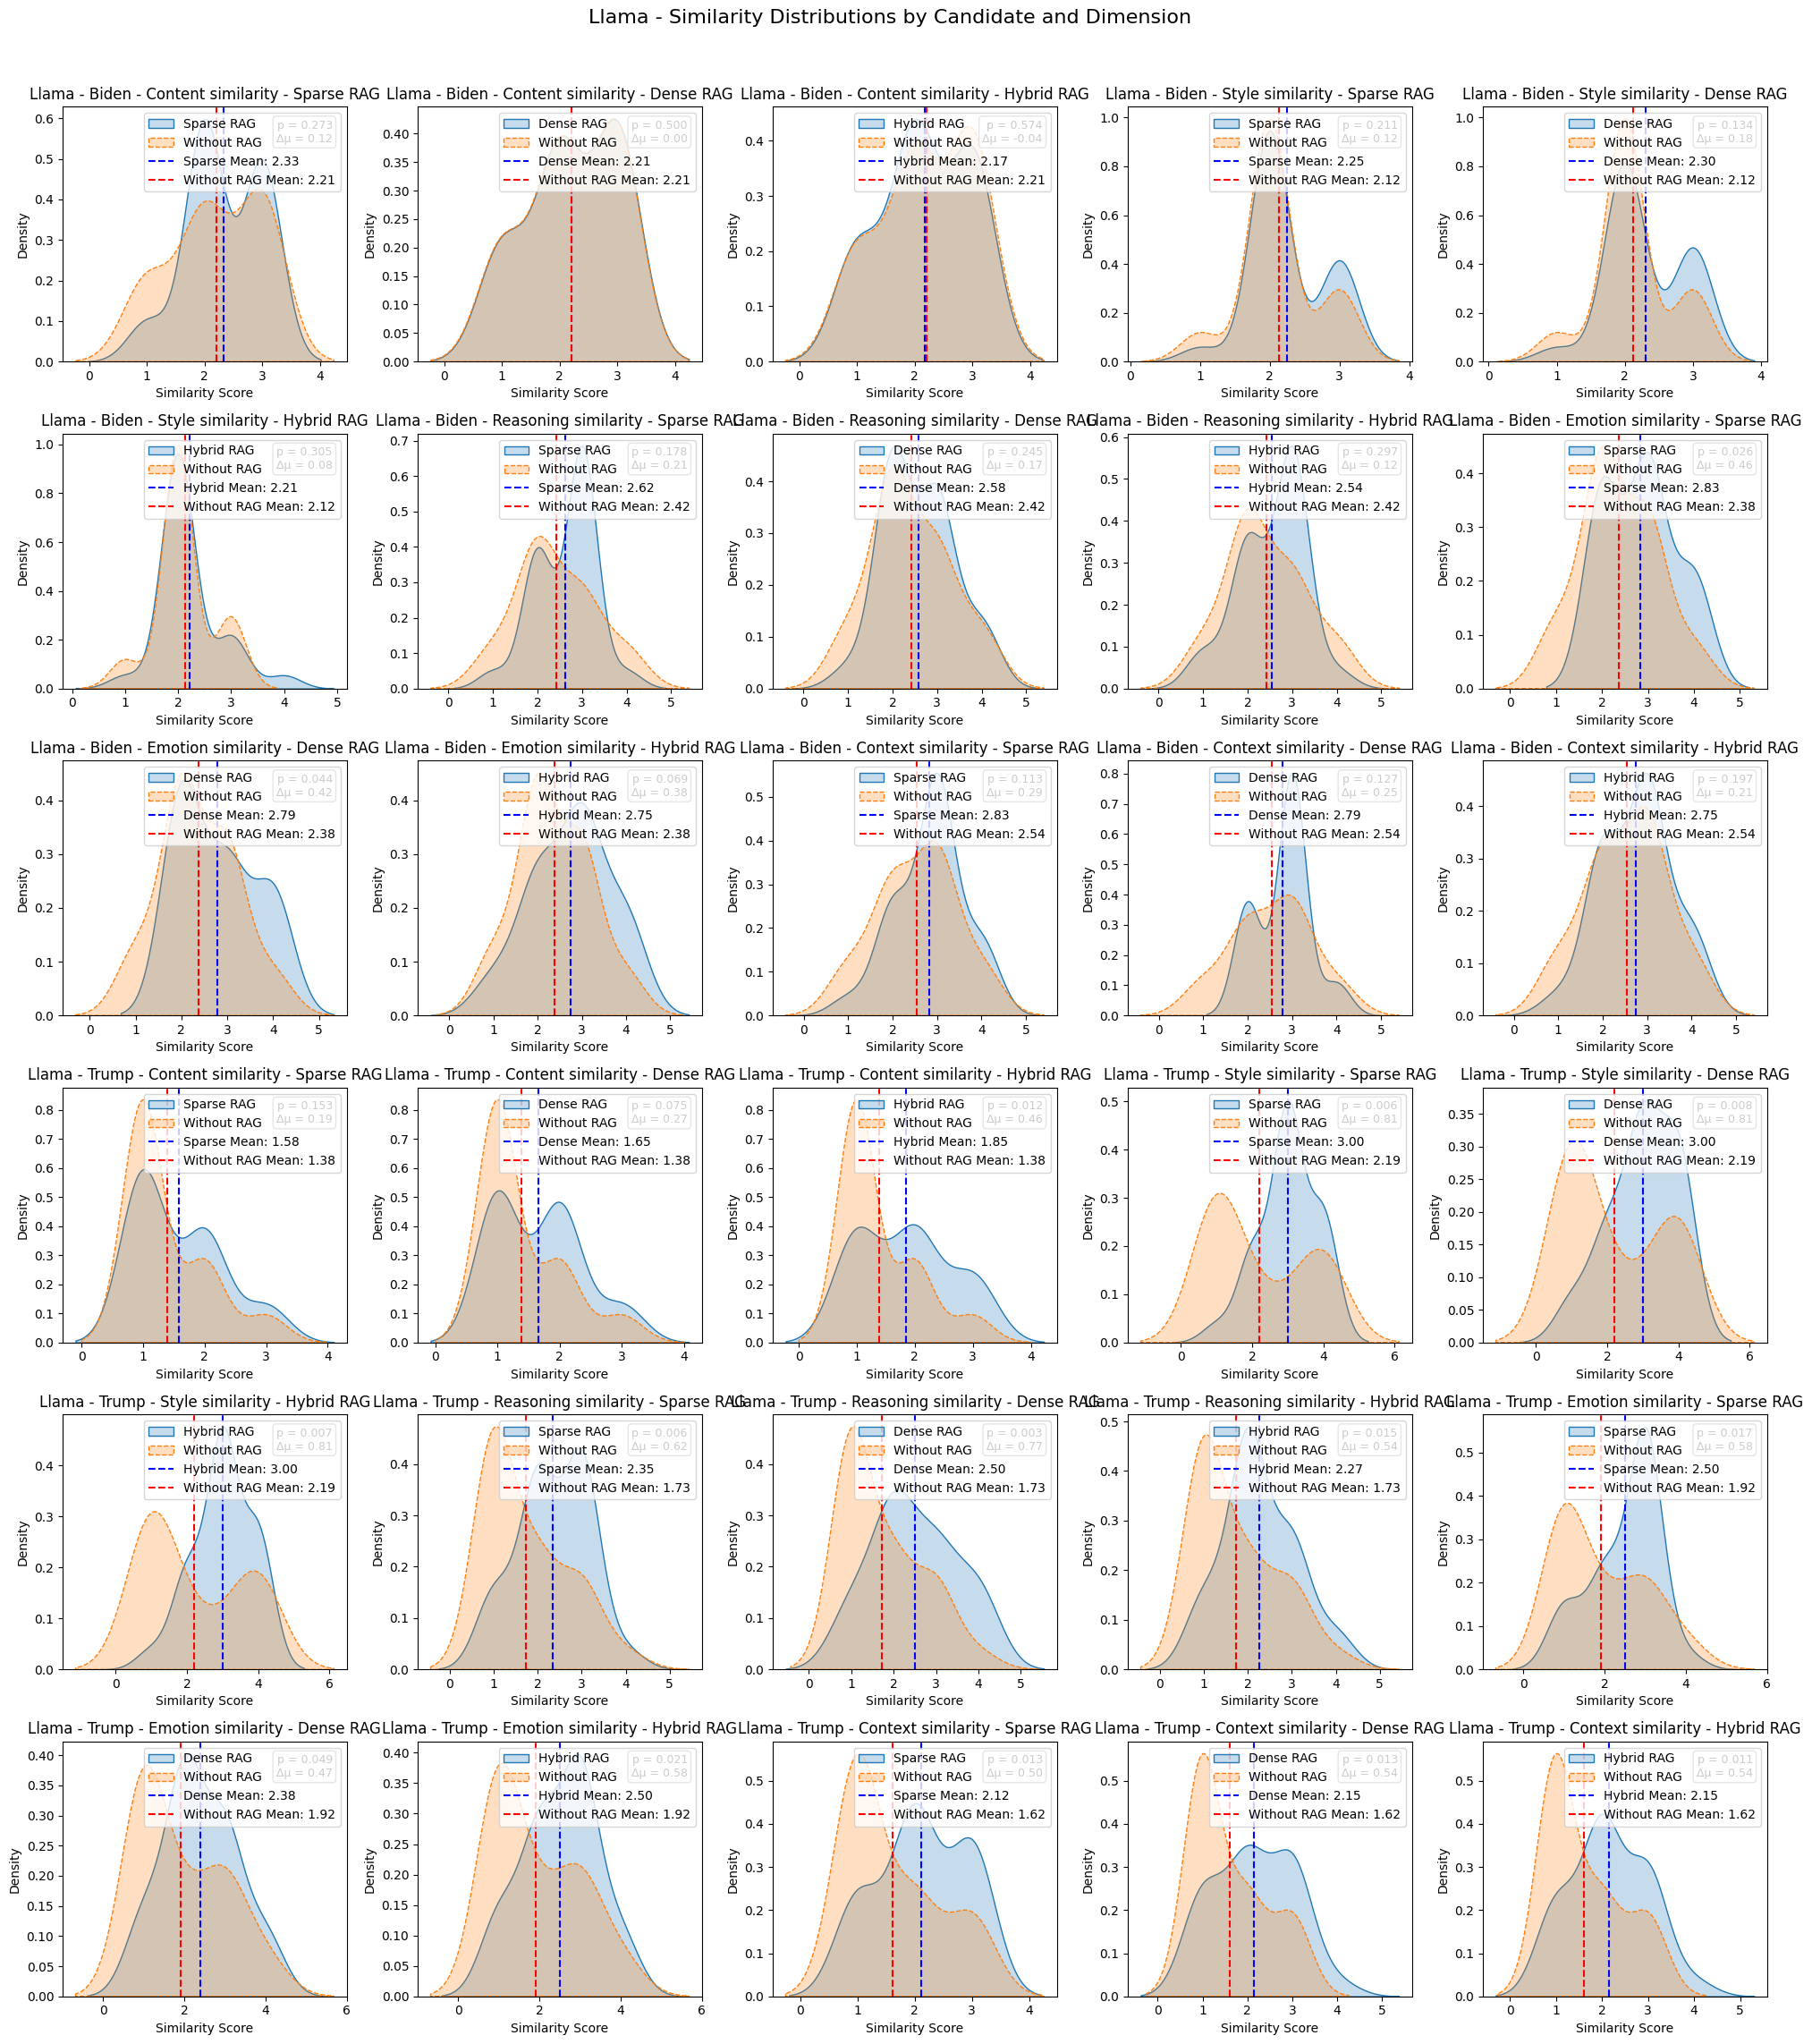


P-Values and Mean Differences for RAG vs. Non-RAG Comparison by Candidate and Dimension (Llama):
Biden - Content similarity - Sparse vs. Without RAG: p-value = 0.273, Δμ = 0.12
Biden - Content similarity - Dense vs. Without RAG: p-value = 0.500, Δμ = 0.00
Biden - Content similarity - Hybrid vs. Without RAG: p-value = 0.574, Δμ = -0.04
Biden - Style similarity - Sparse vs. Without RAG: p-value = 0.211, Δμ = 0.12
Biden - Style similarity - Dense vs. Without RAG: p-value = 0.134, Δμ = 0.18
Biden - Style similarity - Hybrid vs. Without RAG: p-value = 0.305, Δμ = 0.08
Biden - Reasoning similarity - Sparse vs. Without RAG: p-value = 0.178, Δμ = 0.21
Biden - Reasoning similarity - Dense vs. Without RAG: p-value = 0.245, Δμ = 0.17
Biden - Reasoning similarity - Hybrid vs. Without RAG: p-value = 0.297, Δμ = 0.12
Biden - Emotion similarity - Sparse vs. Without RAG: p-value = 0.026, Δμ = 0.46
Biden - Emotion similarity - Dense vs. Without RAG: p-value = 0.044, Δμ = 0.42
Biden - Emotion similarit

In [20]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define directories for GPT-4o and Llama
directories = {
    "gpt4o": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/gpt4o",
    "llama": "/content/drive/MyDrive/RAG Debate Project Lab semester 8/evaluations/dimensions/llama"
}

# Loop through each directory for independent analysis
for model_name, directory in directories.items():
    # Initialize lists to store the extracted data
    data = []

    # Load data without exclusions
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            # Determine RAG type from filename
            if "without_RAG" in filename:
                rag_type = "without_RAG"
            elif "sparse" in filename:
                rag_type = "sparse"
            elif "dense" in filename:
                rag_type = "dense"
            elif "hybrid" in filename:
                rag_type = "hybrid"
            else:
                continue  # Skip any files that don’t match expected RAG types

            file_path = os.path.join(directory, filename)

            # Load JSON file
            with open(file_path, 'r') as f:
                json_data = json.load(f)

                # Process each item in the JSON file
                for item in json_data:
                    candidate = item.get("candidate", "")

                    # Extract similarity scores from each dimension in evaluations
                    for dimension in ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]:
                        similarity = item.get("evaluations", {}).get(dimension, {}).get("Similarity")

                        # Only proceed if similarity score is present
                        if similarity is not None:
                            # Convert similarity score of 6 to 5
                            if similarity == 6:
                                similarity = 5
                            data.append({
                                "candidate": candidate,
                                "rag_type": rag_type,
                                "dimension": dimension,
                                "similarity": similarity
                            })

    # Convert data to a DataFrame for analysis
    df = pd.DataFrame(data)

    # Define candidates, RAG types, and dimensions
    candidates = df["candidate"].unique()
    rag_types = ["sparse", "dense", "hybrid"]
    dimensions = ["content_similarity", "style_similarity", "reasoning_similarity", "emotion_similarity", "context_similarity"]

    # Dictionary to store p-values and mean differences
    results = {}

    # Total number of subplots
    total_subplots = len(candidates) * len(dimensions) * len(rag_types)

    # Determine grid size for subplots
    cols = 5  # Adjust as needed for readability
    rows = (total_subplots + cols - 1) // cols

    # Set up the overall figure size
    plt.figure(figsize=(20, rows * 4))

    plot_idx = 1  # Initialize subplot index

    # Loop over candidates, dimensions, and RAG types
    for candidate in candidates:
        for dimension in dimensions:
            for rag_type in rag_types:
                # Create subplot
                ax = plt.subplot(rows, cols, plot_idx)
                plot_idx += 1

                # Filter data for the current candidate, dimension, and RAG type
                rag_subset = df[(df["candidate"] == candidate) & (df["dimension"] == dimension) & (df["rag_type"] == rag_type)]
                non_rag_subset = df[(df["candidate"] == candidate) & (df["dimension"] == dimension) & (df["rag_type"] == "without_RAG")]

                # Check if data exists
                if rag_subset.empty or non_rag_subset.empty:
                    continue  # Skip if no data

                # Plot distributions
                sns.kdeplot(rag_subset["similarity"], label=f"{rag_type.capitalize()} RAG", fill=True, ax=ax)
                sns.kdeplot(non_rag_subset["similarity"], label="Without RAG", fill=True, linestyle="--", ax=ax)

                # Calculate and plot means
                rag_mean = rag_subset["similarity"].mean()
                non_rag_mean = non_rag_subset["similarity"].mean()
                mean_diff = rag_mean - non_rag_mean  # Mean difference

                if not pd.isna(rag_mean):
                    ax.axvline(rag_mean, linestyle="--", color="blue", label=f"{rag_type.capitalize()} Mean: {rag_mean:.2f}")
                if not pd.isna(non_rag_mean):
                    ax.axvline(non_rag_mean, linestyle="--", color="red", label=f"Without RAG Mean: {non_rag_mean:.2f}")

                # One-sided t-test p-value (alternative='greater' for one-sided test)
                t_stat, p_val = ttest_ind(
                    rag_subset["similarity"].dropna(),
                    non_rag_subset["similarity"].dropna(),
                    alternative='greater'
                )
                # Store p-value and mean difference
                results[(candidate, dimension, rag_type)] = (p_val, mean_diff)

                # Plot settings
                ax.set_title(f"{model_name.capitalize()} - {candidate.capitalize()} - {dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} RAG")
                ax.set_xlabel("Similarity Score")
                ax.set_ylabel("Density")
                ax.legend()

                # Optionally, display p-value and mean difference on the plot
                ax.text(0.95, 0.95, f"p = {p_val:.3f}\nΔμ = {mean_diff:.2f}",
                        transform=ax.transAxes, horizontalalignment='right', verticalalignment='top',
                        fontsize=9, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(f"{model_name.capitalize()} - Similarity Distributions by Candidate and Dimension", fontsize=16)
    plt.show()

    # Print p-values and mean differences for each candidate, dimension, and RAG method
    print(f"\nP-Values and Mean Differences for RAG vs. Non-RAG Comparison by Candidate and Dimension ({model_name.capitalize()}):")
    for (candidate, dimension, rag_type), (p_val, mean_diff) in results.items():
        print(f"{candidate.capitalize()} - {dimension.replace('_', ' ').capitalize()} - {rag_type.capitalize()} vs. Without RAG: p-value = {p_val:.3f}, Δμ = {mean_diff:.2f}")


In [12]:
import nbformat
from nbconvert import NotebookExporter

with open("baselines and more eval.ipynb", "r") as f:
    nb = nbformat.read(f, as_version=4)

with open("saved_notebook.ipynb", "w") as f:
    nbformat.write(nb, f)


FileNotFoundError: [Errno 2] No such file or directory: 'baselines and more eval.ipynb'